# __Final Project__
## Hotel Reservation Cancellation Prediction
- Group Members: Qing Dou, Ruoyu Chen, Zhengnan Li
- Repository: https://github.com/jc000222/Data_Science_DAV6150/tree/main/FinalProject

# 1 Abstract

This project aims to predict hotel booking cancellations, a challenge that significantly affects hotel profitability and operational efficiency. We use a dataset encompassing booking-related factors and weather data to identify key predictors for cancellations. Multiple machine learning models, including Logistic Regression, Neural Network, Decision Tree, and SARIMA for time-series analysis, were developed to explore the prediction accuracy. Additionally, an ensemble model combined predictions from various models to improve overall accuracy. The ensemble model outperformed individual models with an accuracy of 82.86%, precision of 82.76%, recall of 82.86%, and AUC score of 0.8145. This predictive model provides valuable insights that hotels can leverage to mitigate the negative impact of cancellations and enhance profitability through improved revenue management.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import warnings
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
import numpy as np
warnings.filterwarnings('ignore', category=FutureWarning)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error,make_scorer, r2_score, confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 2 Introduction 

In this project, we aim to create a predictive model that can be used to accurately predict whether a hotel reservation will be canceled. This is important for hotels because canceled bookings can severely impact a hotel's revenue and related operational strategies. Accurate information about room reservations is key to decrease the hotel losses, such as the profit loss of last-minute cancellations. Whether a hotel receives advance notice or not, these cancellations result in vacancies in their booked rooms that could have been re-rented to others. However when cancellations are received at the last minute, which can make it difficult to schedule re-released rooms. 

The negative impact of cancellations includes not only the loss of revenue from these vacant rooms, but also the additional costs associated with the distribution channel for re-booking, as well as lower profit margins due to having to sell the rooms at a reduced price at the last minute. However, by accurately predicting cancellations and taking steps that can effectively decrease the negative impact of cancellations, hotels can improve profitability and operational efficiency. We utilize a dataset containing a wide range of booking-related factors to provide valuable insights for hotel management. Our goal is to build a robust model that helps hotels refine their operational processes and maximize the revenue.

### 2.1 Literature Review: 
This data has been used in many literatures for machine learning, and we select a few to show the scope of the researches others have done.  

__Application of machine learning to cluster hotel booking curves for hotel demand forecasting__  
Link: https://www.sciencedirect.com/science/article/pii/S2352340918315191  
This study proposes a new method for daily hotel demand forecasting, leveraging clusters of stay dates from historical booking data. Results indicate improved accuracy in demand forecasts when generated at the cluster level, aiding data-driven revenue management amidst the COVID-19 pandemic's demand fluctuations.
__Forecasting Hotel Demand Using Machine Learning Approaches__  
Link: https://www.researchgate.net/publication/340134067_Forecasting_Hotel_Demand_Using_Machine_Learning_Approaches  
This study compares traditional pick-up based models with machine learning approaches for forecasting hospitality demand, demonstrating the superior performance of machine learning models, especially with longer booking histories. These findings have practical implications for improving forecast accuracy and revenue optimization in hotel management, while also laying the foundation for future research in refining machine learning models for revenue management.
__Prediction of hotel booking cancellations: Integration of machine learning and probability model based on interpretable feature interaction__  
link:
https://www.sciencedirect.com/science/article/pii/S0167923623000349  
The scope of the research is to enhance hotel cancellation prediction by proposing an interpretable feature interaction method and integrating Bayesian networks and Lasso regression models. 

| Model                                    | Accuracy   | Recall    | Precision  | F1-score  |
|------------------------------------------|------------|-----------|------------|-----------|
| BN                                       | 0.7818     | 0.3890    | 0.6891     | 0.4972    |
| Lasso-original                          | 0.7624     | 0.2225    | 0.7455     | 0.3428    |
| Lasso-original-Bayesian                 | 0.7823     | 0.3936    | 0.6914     | 0.5016    |
| Lasso-original-Bayesian-interaction     | 0.8186     | 0.5097    | 0.7597     | 0.6101    |

### 2.2 Reasearch Questions
1. __What are the key factors affecting hotel booking cancellation, and how can we predict the cancellations?__  
    The research into factors influencing hotel booking cancellations and predictive modeling can have significant implement for the hotel bussiness. Most online travel agency have loose cancellation policy for users, in oreder to encourage the booking activities. However the pressure for handling the cancellations falls on the hotels, for cancelled rooms lead to revenue loss and reduced profits due to price reductions, and increase advertising costs. By identifying key factors in booking information that contribute to cancellations, such as lead time, deposit type, and special requests, hotels can predict the cancellation of the booking orders and  make informed decisions about overbooking, room pricing, and staffing levels, ultimately enhancing efficiency, profitability, and customer satisfaction.In addition, we believe that weather conditions are also an important factor affecting hotel reservation cancellations, so we also imported the weather conditions in Lisbon, Portugal from 2015 to 2017.  
    With this predictive model, hotels can proactively identify which users are likely to cancel their bookings and take remedial actions in a timely manner. For instance, by reaching out to users with a higher likelihood of cancellation in advance, hotels can encourage them to cancel their bookings as early as possible, thereby allowing the hotel to free up more rooms for sale.Alternatively, hotels can also engage with users who show tendencies to cancel by highlighting the advantages of staying at the hotel and offering incentives or rewards for staying, aiming to persuade them to retain their bookings.
    
2. __How can managing and predicting daily hotel booking volumes from July 2015 to October 2017 using time series and ARIMA models help improve hotel operational management?__ 
Analyzing and forecasting daily hotel booking volumes using time series and ARIMA models can provide robust decision support for hotel management. This approach enables understanding of booking volume trends over different periods, aiding hotels in adjusting pricing strategies, optimizing staffing, and improving marketing activities to cope with seasonal fluctuations in bookings. For instance, if analysis identifies specific periods with high cancellation rates, hotels can proactively adjust pricing strategies or launch targeted marketing campaigns to mitigate potential revenue losses. Implementing this predictive model will allow hotels to manage their room bookings more effectively, maximizing occupancy rates and revenue.


### 2.3 Data to be Used
The data we will be using is sourced from github: https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-02-11 and visual crossing: https://www.visualcrossing.com/weather/weather-data-services. We will be using pandas to read the raw file directly from the website. To maintain consistency, we download the raw file from the website, save it to our own repository, and then use pandas to read the CSV file.  
The first Data set contains 119390 rows of observation and 32 variables.The second dataset about weather from 2015 to 2017 will be filtered in the future analysis.  


__Data Dictionary__

| Variable                        | Description                                                                                                          |
|--------------------------------|----------------------------------------------------------------------------------------------------------------------|
| hotel                          | Hotel (Resort Hotel or City Hotel)                                                                         |
| lead_time                      | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date             |
| arrival_date_year              | Year of arrival date                                                                                                 |
| arrival_date_month             | Month of arrival date                                                                                                |
| arrival_date_week_number       | Week number of year for arrival date                                                                                 |
| arrival_date_day_of_month      | Day of arrival date                                                                                                  |
| stays_in_weekend_nights        | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel                       |
| stays_in_week_nights           | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel                            |
| adults                         | Number of adults                                                                                                     |
| children                       | Number of children                                                                                                   |
| babies                         | Number of babies                                                                                                     |
| meal                           | Type of meal booked. Categories are presented in standard hospitality meal packages                                 |
| country                        | Country of origin. Categories are represented in the ISO 3155–3:2013 format                                         |
| market_segment                 | Market segment designation. In categories, the term "TA" means "Travel Agents" and "TO" means "Tour Operators"      |
| distribution_channel           | Booking distribution channel. The term "TA" means "Travel Agents" and "TO" means "Tour Operators"                   |
| is_repeated_guest              | Value indicating if the booking name was from a repeated guest (1) or not (0)                                       |
| previous_cancellations         | Number of previous bookings that were cancelled by the customer prior to the current booking                          |
| previous_bookings_not_canceled | Number of previous bookings not cancelled by the customer prior to the current booking                               |
| reserved_room_type             | Code of room type reserved. Code is presented instead of designation for anonymity reasons                           |
| assigned_room_type             | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons | 
| booking_changes                | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation |
| deposit_type                   | Indication on if the customer made a deposit to guarantee the booking                                                |
| agent                          | ID of the travel agency that made the booking                                                                        |
| company                        | ID of the company/entity that made the booking or responsible for paying the booking                                  |
| days_in_waiting_list           | Number of days the booking was in the waiting list before it was confirmed to the customer                           |
| customer_type                  | Type of booking, assuming one of four categories                                                                     |
| adr                            | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
| required_car_parking_spaces    | Number of car parking spaces required by the customer                                                                |
| total_of_special_requests      | Number of special requests made by the customer (e.g. twin bed or high floor)                                        |
| reservation_status             | Reservation last status, assuming one of three categories                                                            |
| reservation_status_date        | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus           |


In [2]:
hotel_raw = pd.read_csv("https://raw.githubusercontent.com/jc000222/Data_Science_DAV6150/main/FinalProject/hotel.csv")
display(hotel_raw.shape)
hotel_raw.head(5)

(119390, 33)

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


- Dataset 2

In [3]:
weather_raw = pd.read_csv('https://raw.githubusercontent.com/Zhengnan817/DAV-6150/main/Final_project/src/Lisbon%2CPortugal%202015-01-01%20to%202017-09-26.csv')
display(weather_raw.shape)
weather_raw.head(5)

(1000, 33)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Lisbon,Portugal",2015-01-01,14.7,2.9,8.5,14.7,2.1,7.9,1.1,61.4,...,10.0,5,NaN,2015-01-01T07:54:47,2015-01-01T17:25:26,0.37,Clear,Clear conditions throughout the day.,clear-day,"08535099999,08534099999,08536099999,LPPT,08579..."
1,"Lisbon,Portugal",2015-01-02,12.6,2.3,7.9,12.6,0.1,6.8,3.9,77.2,...,10.2,5,NaN,2015-01-02T07:54:55,2015-01-02T17:26:15,0.40,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,"08535099999,08534099999,08536099999,LPPT,08579..."
2,"Lisbon,Portugal",2015-01-03,13.9,4.2,8.6,13.9,1.9,7.6,2.9,69.0,...,10.2,5,NaN,2015-01-03T07:55:01,2015-01-03T17:27:05,0.44,Clear,Clear conditions throughout the day.,clear-day,"08535099999,08534099999,08536099999,LPPT,08579..."
3,"Lisbon,Portugal",2015-01-04,14.0,3.2,8.2,14.0,3.2,7.7,4.2,77.0,...,10.2,5,NaN,2015-01-04T07:55:05,2015-01-04T17:27:57,0.48,Clear,Clear conditions throughout the day.,clear-day,"08535099999,08534099999,08536099999,LPPT,08579..."
4,"Lisbon,Portugal",2015-01-05,12.4,2.4,7.6,12.4,1.0,7.2,5.3,86.0,...,8.9,5,NaN,2015-01-05T07:55:07,2015-01-05T17:28:50,0.50,Clear,Clear conditions throughout the day.,clear-day,"08532099999,08535099999,08534099999,0853609999..."


- Merged Dataset  
    Perform a inner join on the datetime for the two datasets. The observation number of 'hotel_raw' stays the same as 119390.

In [4]:
date_str = hotel_raw['arrival_date_year'].astype(str) + '-' + hotel_raw['arrival_date_month'].astype(str) + '-' + hotel_raw['arrival_date_day_of_month'].astype(str)
hotel_raw['datetime'] = pd.to_datetime(date_str)
weather_raw['datetime'] = pd.to_datetime(weather_raw['datetime'])
hotel_raw = pd.merge(hotel_raw, weather_raw, on='datetime', how='inner')
display(hotel_raw.shape)

(119390, 66)

### 2.4 Project Report Structure
__1. Abstract:__ Summarize our problem, methodology, and major outcomes.  
__2. Introduction:__ Briefly describe the purpose and motivation behind the project, introduce the dataset, including its origin, size, and the types of variables it contains and clearly state the question or problem our project aims to address.  
__3. Exploratory Data Analysis:__ Conduct an initial exploration to understand the dataset's characteristics, such as distributions of key variables, presence of missing values, and potential outliers.The following are diagrams that may be used.  
- Correlation Heatmaps: To visualize the relationships between different variables and identify those most correlated with booking cancellations.
- Bar Charts and histogram: To illustrate the distribution of categorical variables like hotel type, deposit type, and market segment.
- Box Plots: To explore the distribution of numerical variables and identify outliers or anomalies that could affect cancellation predictions.  

__4. Data Preparation:__ Clean and preprocess the data to enhance its quality and suitability for modeling, including addressing missing values, outliers, and feature engineering.  
__5. Prepped Data Overview:__ Conduct a secondary EDA on the prepared data to verify its readiness for modeling and to refine the analysis strategy.  
__6. Machine Learning Models:__ Build the models to identify the most effective approach for the research question. Thses are models we are going to use:  
- Logistic Regression: Logistic Regression is a statistical method widely used for binary classification problems, predicting the probability of an event occurring. In the context of hotel booking cancellations, it can be used to estimate the probability of a booking being canceled.The model is simple and highly interpretable, making it suitable as a baseline model.
- Neural Network Model: Neural Networks mimic the structure and function of the human brain, suitable for dealing with complex nonlinear problems. With a multi-layered structure, neural networks can capture and learn deep features and patterns in the data. And the model is with powerful data fitting capabilities, particularly effective for large-scale and high-dimensional datasets.
- Decision Tree Model: Decision Trees split the data through a series of rules, each split representing a decision node, until the prediction objective is reached. It is an intuitive model that clearly shows the decision-making process and logic. The model is easy to understand and interpret, visually representing the decision-making process.

__7. Model Selection:__ Evaluate model performance using metrics such as confusion matrix, accuracy, recall, F1 score, and ROC curve.Compare the performance of different models to identify the most suitable one for predicting hotel booking cancellations.  
__8. Ensemble Model:__  In addition to these individual models, an ensemble approach will be considered to combine the predictions from each model to improve overall accuracy. The ensemble method could be a simple voting ensemble, where predictions from each model are combined to make a final decision, or a more complex stacking approach, where the outputs of individual models serve as inputs to a final model that makes the ultimate prediction.  
__9. Conclusions:__  Summarize the project's findings, the efficacy of the selected model, and suggest avenues for future research building on the current work.

# 3 Explanatory Data Analysis

First define the functions and variable names to be used for EDA.

In [5]:
sns.set(style="whitegrid")
def hist(attributes):
    
    if len(attributes) == 1:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
        sns.histplot(data=hotel_raw[attributes[0]], ax=axes)
        axes.set_xlabel(attributes[0])
        axes.set_ylabel('')
    else:
        fig, axes = plt.subplots(nrows=1, ncols=len(attributes), figsize=(len(attributes)*4, 4))
        for i in range(len(attributes)):
            sns.histplot(ax=axes[i], data=hotel_raw[attributes[i]])
            axes[i].set_xlabel(attributes[i])
            axes[i].set_ylabel('')
    plt.show()
def box(attributes):
    if len(attributes) == 1:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
        sns.boxplot(data=hotel_raw[attributes[0]], ax=axes)
        axes.set_xlabel(attributes[0])
        axes.set_ylabel('')
    else:
        fig, axes = plt.subplots(nrows=1, ncols=len(attributes), figsize=(len(attributes)*4, 4))
        for i in range(len(attributes)):
            sns.boxplot(ax=axes[i], data=hotel_raw[attributes[i]])
            axes[i].set_xlabel(attributes[i])
            axes[i].set_ylabel('')
    plt.show()
def bar(attributes,df):
    if len(attributes) == 1:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
        sns.countplot(x=df[attributes[0]], ax=axes)
        axes.set_xlabel(attributes[0])
        axes.set_ylabel('')
    else:
        fig, axes = plt.subplots(nrows=1, ncols=len(attributes), figsize=(len(attributes)*4, 4))
        for i in range(len(attributes)):
            sns.countplot(ax=axes[i], x=df[attributes[i]])
            axes[i].set_xlabel(attributes[i])
            axes[i].set_ylabel('')
    plt.show() 
def scatter(attributes):
    if len(attributes) == 1:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
        sns.scatterplot(x=hotel_raw[attributes[0]],y=hotel_raw["TARGET"], ax=axes)
        axes.set_xlabel(attributes[0])
        axes.set_ylabel('shares')
    else:
        fig, axes = plt.subplots(nrows=1, ncols=len(attributes), figsize=(len(attributes)*4, 4))
        for i in range(len(attributes)):
            sns.scatterplot(ax=axes[i], x=hotel_raw[attributes[i]],y=hotel_raw["TARGET"],alpha=0.1)
            axes[i].set_xlabel(attributes[i])
            axes[i].set_ylabel('')
            axes[0].set_ylabel('shares')
    plt.show()

scoring_functions = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'roc_auc': make_scorer(roc_auc_score)
}
def cv_metrics(name,model):
    print(f"-------------------\n{name} corss validation Metrics")
    cv_results = {}
    for metric, scorer in scoring_functions.items():
        cv_scores = cross_val_score(model, X, y, cv=5, scoring=scorer)
        cv_results[metric] = cv_scores

    for metric, scores in cv_results.items():
        print(f"Average {metric}:", round(scores.mean(),4))
        
def metrics_test(name,y,predicted):
    accuracy = accuracy_score(y, predicted)
    precision = precision_score(y, predicted, average='weighted')
    recall = recall_score(y, predicted, average='weighted')
    f1 = f1_score(y, predicted, average='weighted')
    auc = roc_auc_score(y, predicted)

    print(f"-------------------\n{name} Metrics")
    print("Accuracy:", round(accuracy, 4))
    print("Precision:", round(precision, 4))
    print("Recall:", round(recall, 4))
    print("F1 Score:", round(f1, 4))
    print("AUC Score:", round(auc, 4))
numeric_hotel = ['lead_time','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','reservation_status_date']
categorical_hotel = ['hotel','arrival_date_month','meal','country','market_segment','distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type','deposit_type','agent','company','customer_type','reservation_status']
numeric_weather = ['tempmax','tempmin','temp','feelslikemax','feelslikemin','feelslike','dew','humidity','precip','precipprob','precipcover','snowdepth','windgust','windspeed','winddir','sealevelpressure','cloudcover','visibility','solarradiation','solarenergy','uvindex','severerisk','stations']
categorical_weather = ['name','preciptype','snow','conditions','description','icon']

- __'Lead_time':__  
    The data is heavily left skewed, having most value on 0. 
- __'arrival_date_year','arrival_date_week_number','arrival_date_day_of_month', 'total_of_special_requests','reservation_status_date':__  
    The data is roughly evenly distributed.
- __'stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces':__   
    These variables has most value on the lower side, indicating a potential outliers of extreme value.

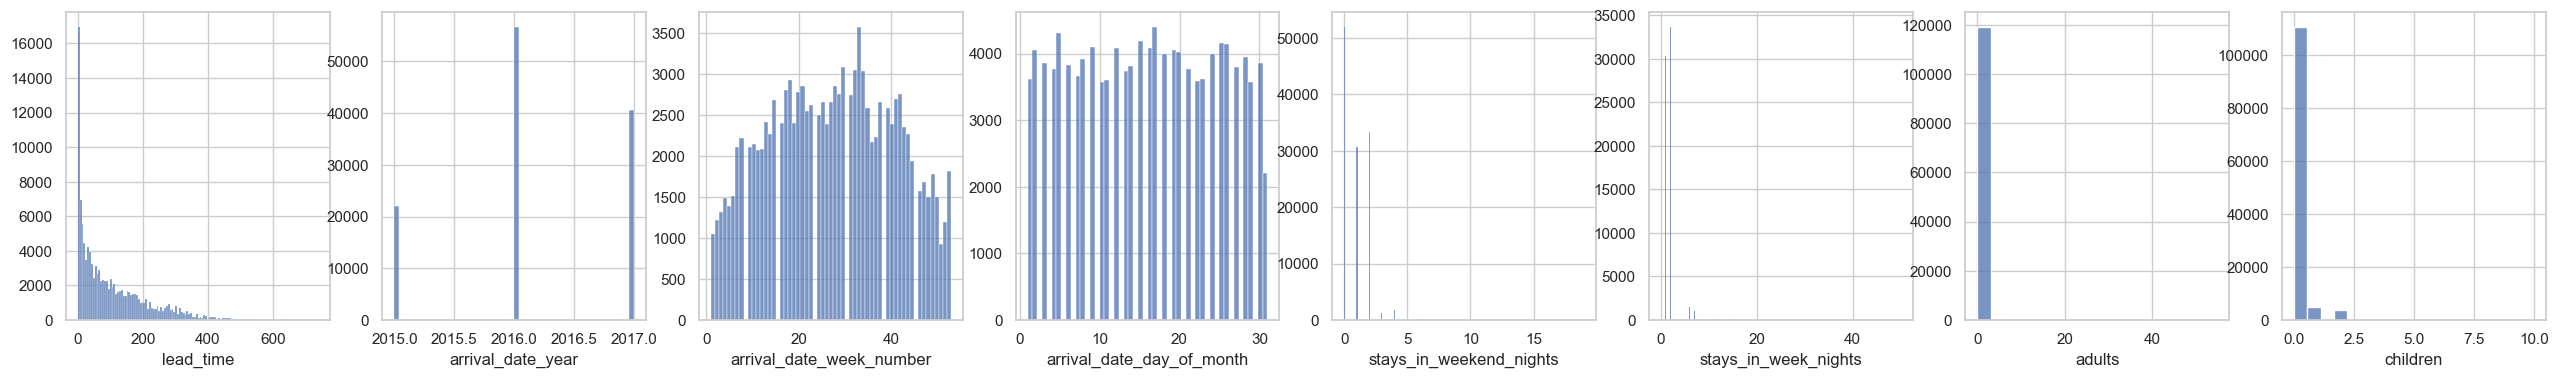

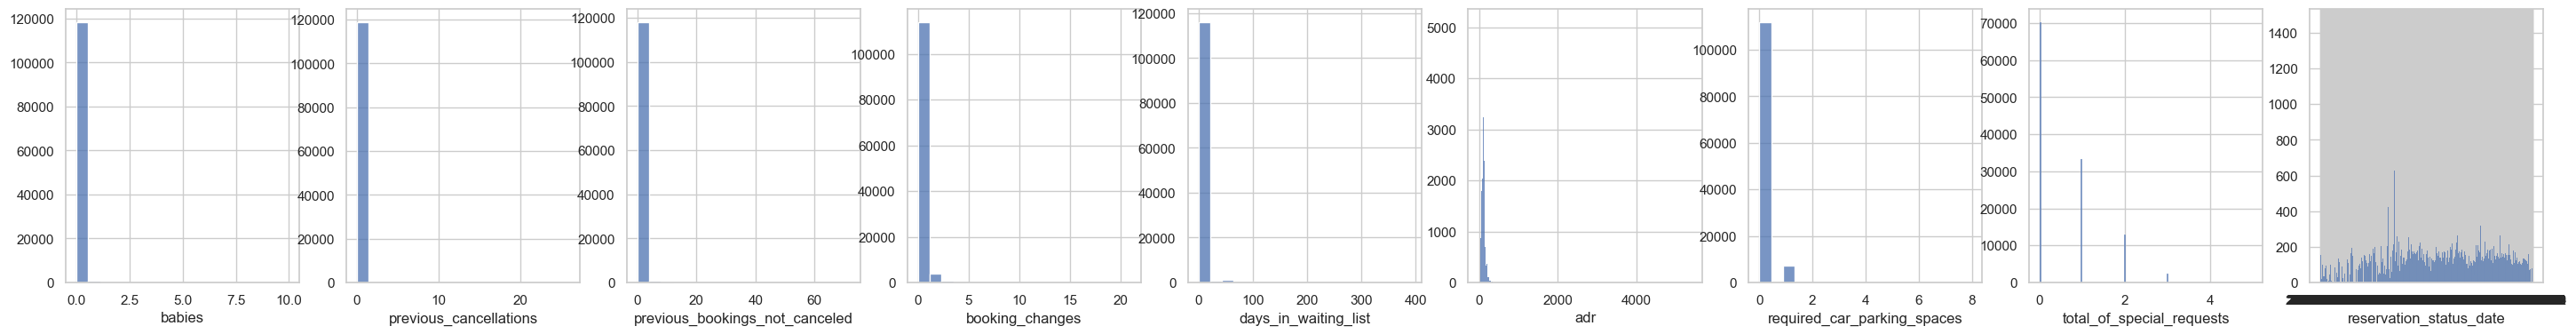

In [6]:
hist(numeric_hotel[:8])
hist(numeric_hotel[8:])

Categorical variables such as country, agent and company has too many categories and most of them are null values.  
There are undefined category in __'meal', 'distribution_channel'__.  
__'Reservation_status'__ has a risk of data leaking.

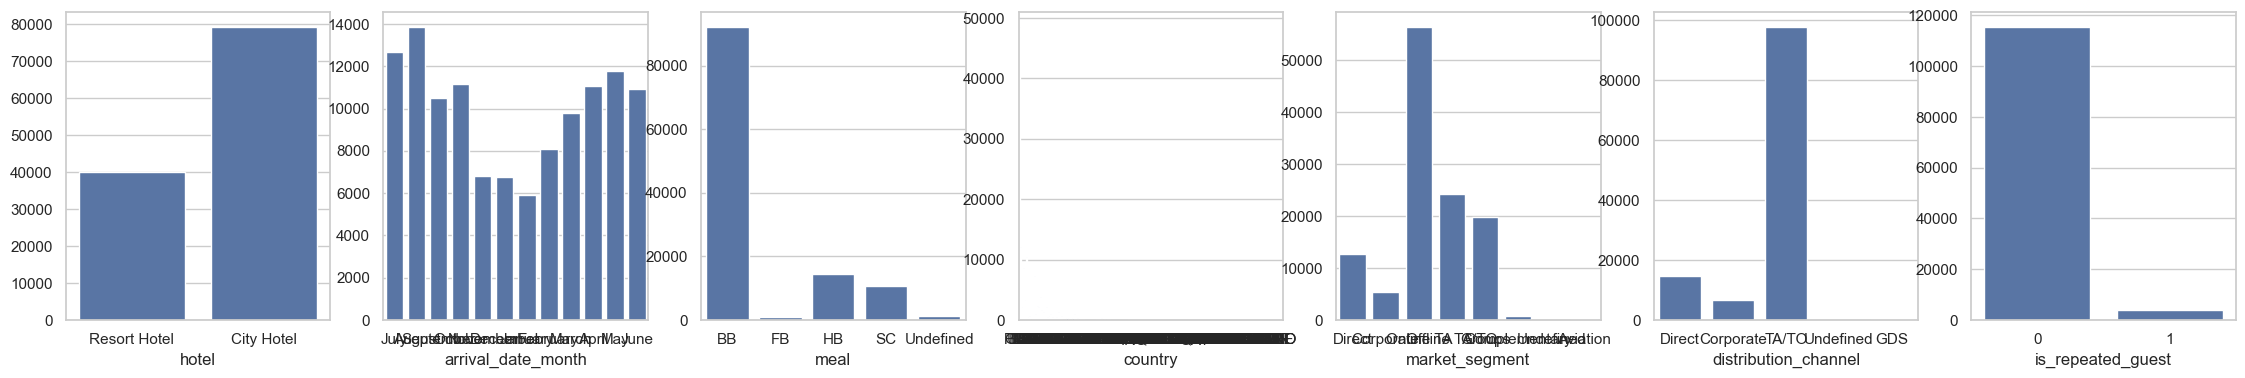

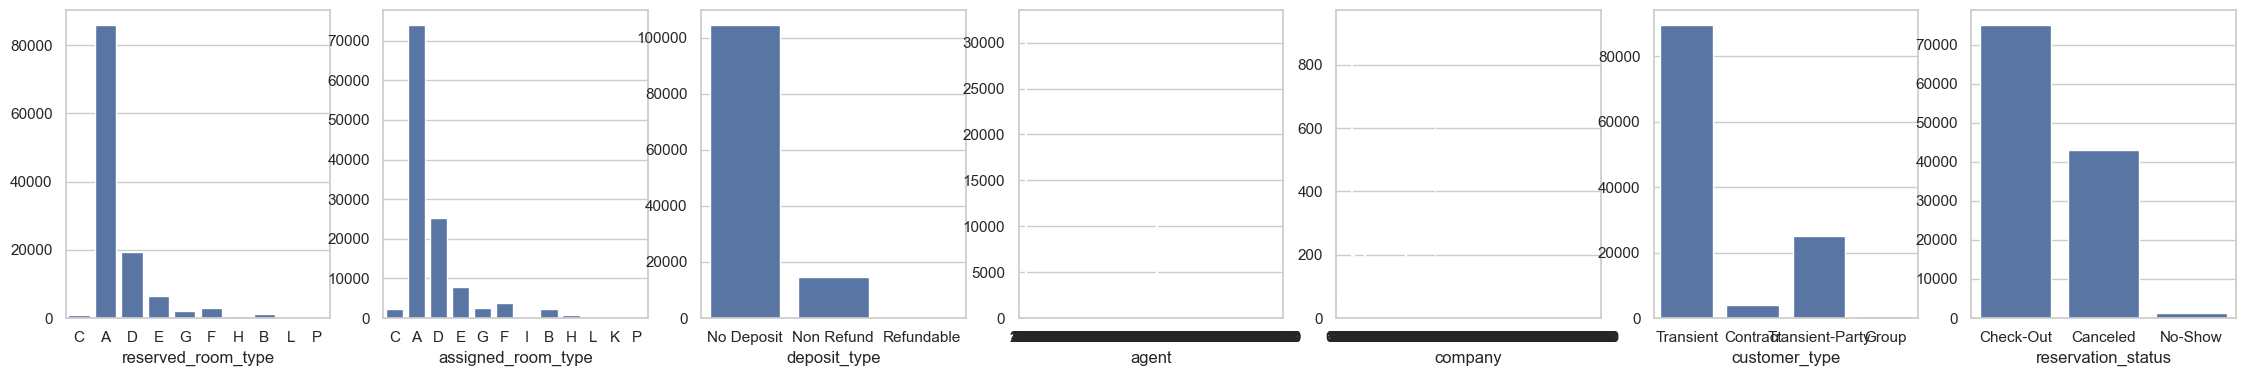

In [7]:
bar(categorical_hotel[:7],hotel_raw)
bar(categorical_hotel[7:],hotel_raw)

Most of the variable is close to a normal distribution. However, __'presip'__ has most value on 0, and __'snowdepth'__ has only one value, __'winddir'__ is right skewed.

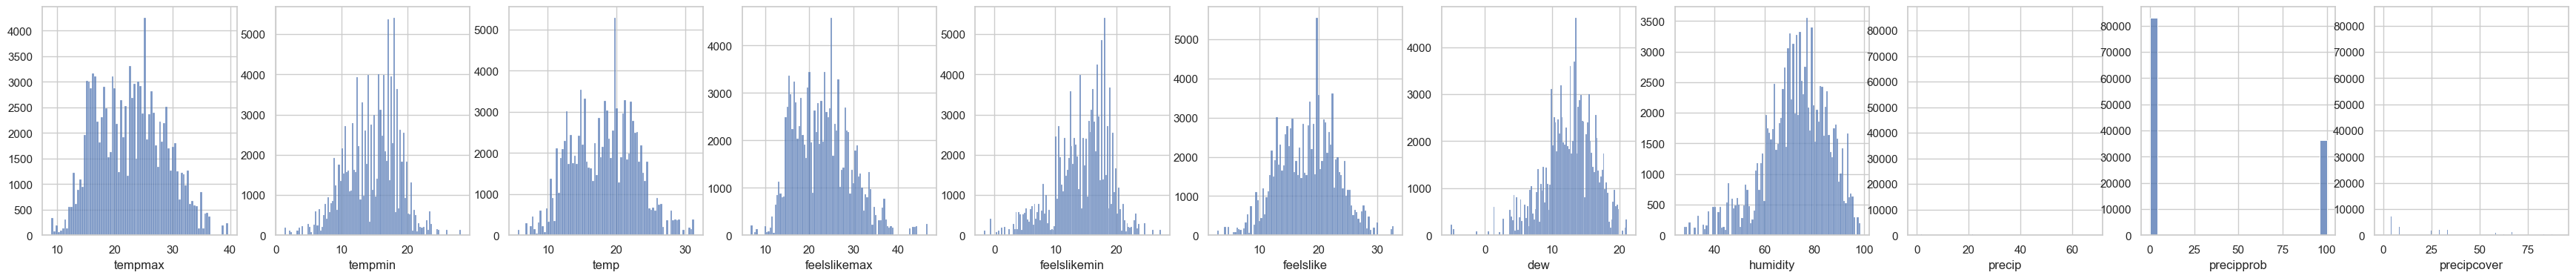

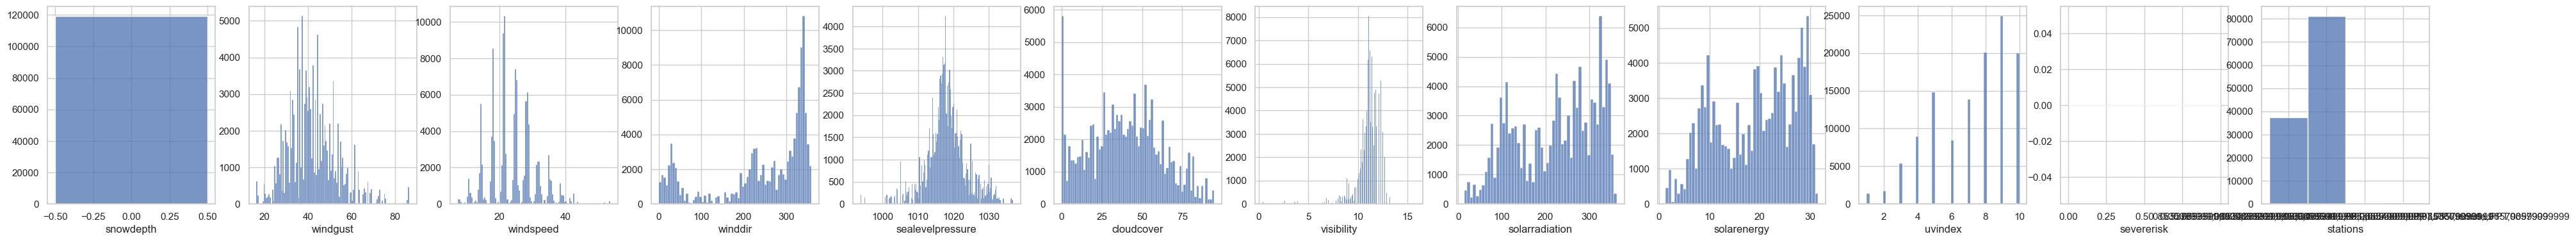

In [8]:
hist(numeric_weather[:11])
hist(numeric_weather[11:])

Variables such as __'name', 'preciptype', 'snow'__ is uni-valued.

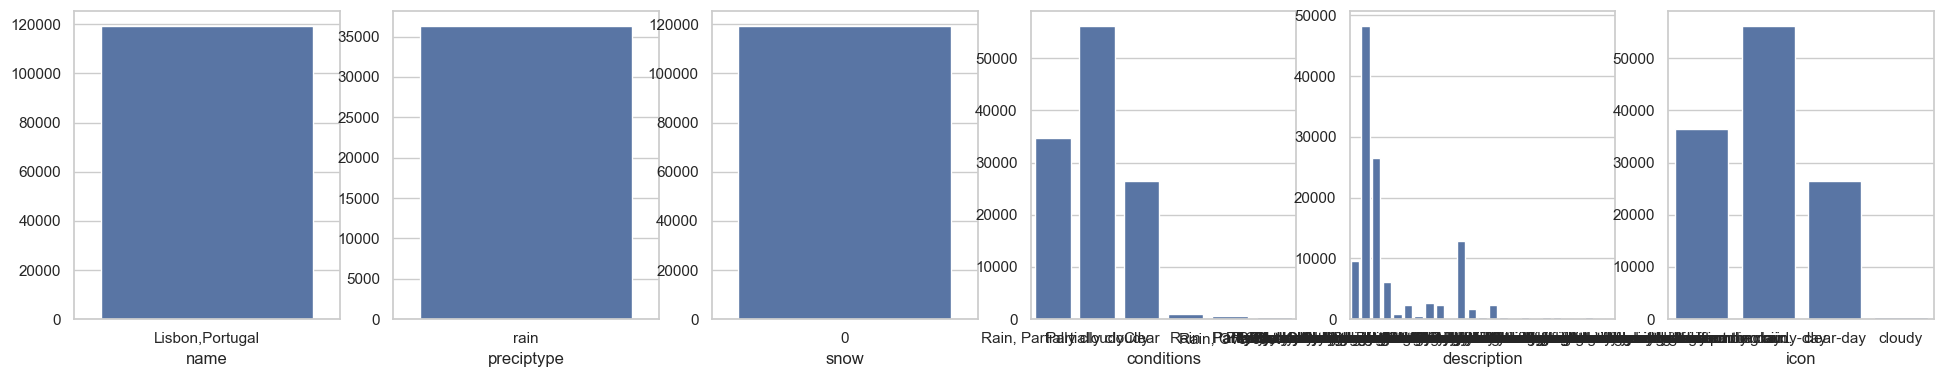

In [9]:
bar(categorical_weather,hotel_raw)

Target Variable
The data is slightly biased and the Null Error Rate is 0.62.

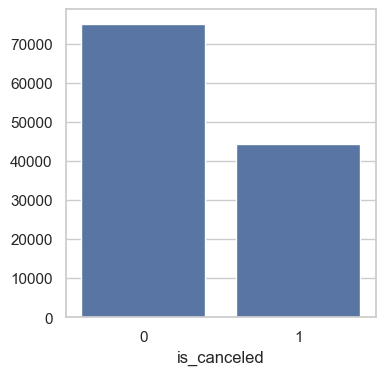

Null Error Rate: 0.6295837172292487


In [10]:
bar(['is_canceled'],hotel_raw)
class_counts = hotel_raw['is_canceled'].value_counts()
null_error_rate = (class_counts.max() / class_counts.sum())

print("Null Error Rate:", null_error_rate)

# 4 Data Preparation

### 4.1 Missing value
Variable __'severerisk', 'company','preciptype'__ has over half more null values, hence we will drop the column.
Variable __'country', 'children'__ has relatively small amount of null values, we will drop the observation with null values.

severerisk     119390
company        112593
preciptype      83059
agent           16340
country           488
children            4
Unnamed: 0          0
precipprob          0
snow                0
precipcover         0
dtype: int64

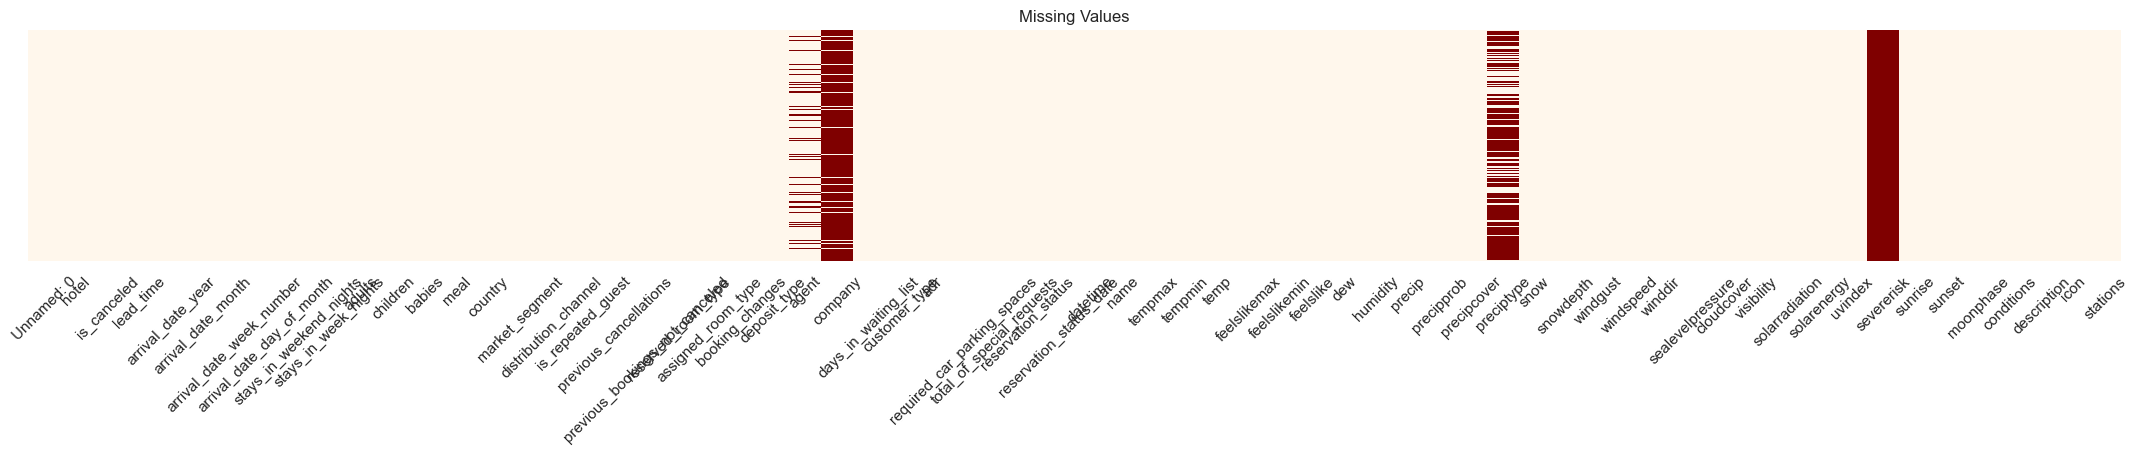

In [11]:
plt.rcParams["figure.figsize"] = (27, 3)
sns.heatmap(hotel_raw.isnull(), yticklabels=False, cbar=False, cmap="OrRd")
plt.title("Missing Values")
plt.xticks(rotation=45)
display(hotel_raw.isnull().sum().sort_values(ascending=False).head(10))

hotel_raw.drop(columns=['severerisk', 'company','preciptype'], inplace=True)
hotel_raw.dropna(subset=['country', 'children'], inplace=True)

Remove the undefined category from dataset.

In [12]:
hotel_raw = hotel_raw[(hotel_raw['meal'] != 'Undefined') | (hotel_raw['distribution_channel'] != 'Undefined')]

### 4.2 Outliers
Calculate the interquartile range (IQR), data points that fall below the first quartile or above the third quartile are considered outliers and will be removed.
For variable 'children', 'babies' and 'adr', remove the outliers manually.

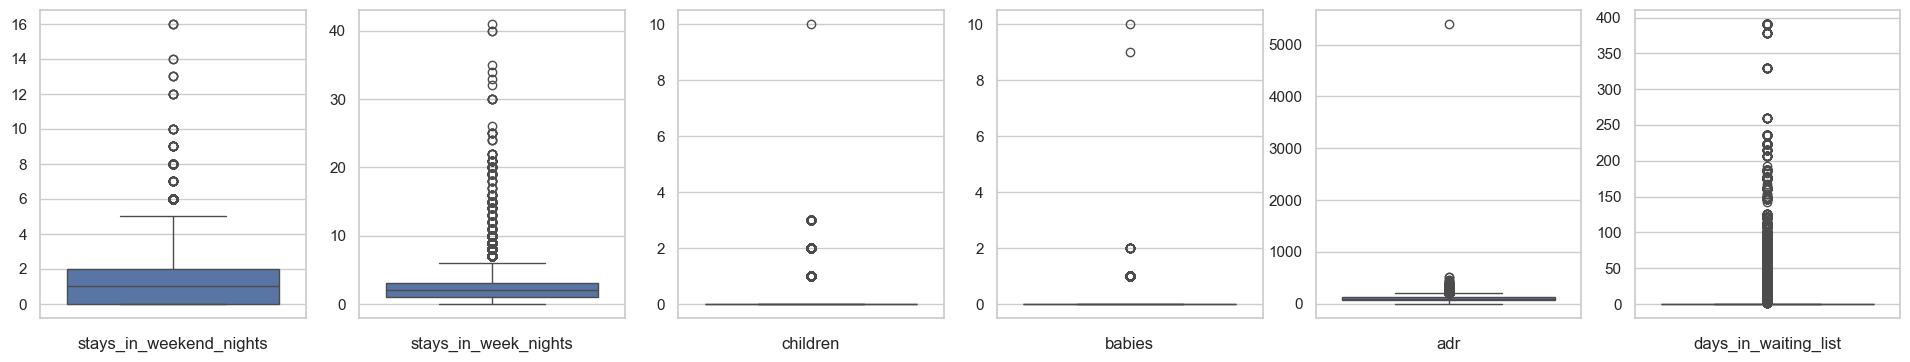

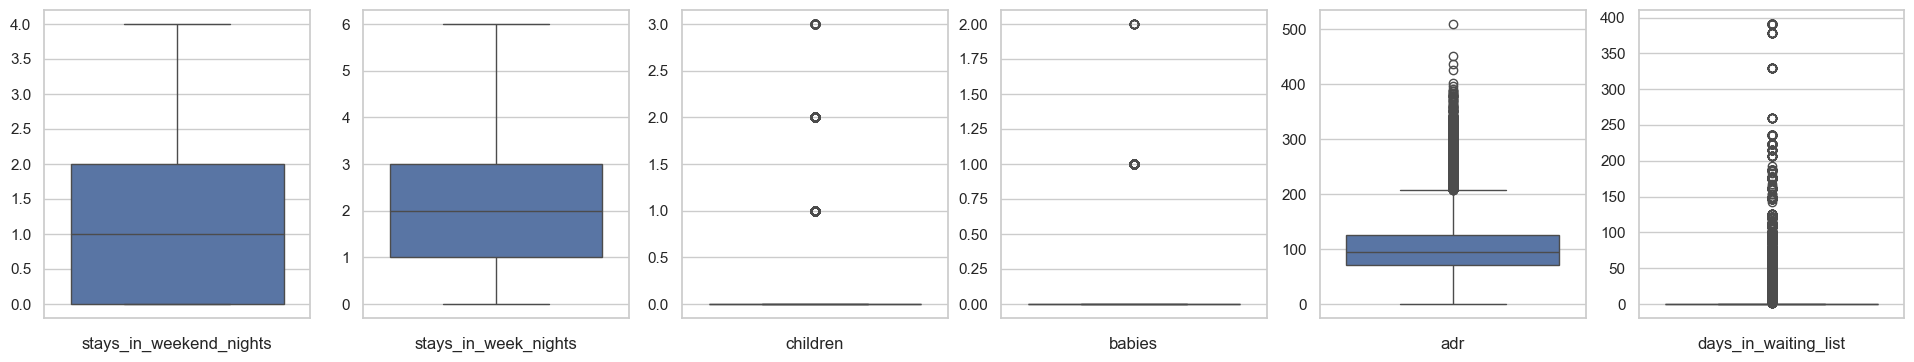

In [13]:
box(['stays_in_weekend_nights','stays_in_week_nights','children','babies','adr','days_in_waiting_list'])
columns_to_clean = ['stays_in_weekend_nights','stays_in_week_nights','previous_bookings_not_canceled']
for attribute in columns_to_clean:
    Q1 = hotel_raw[attribute].quantile(0.25)
    Q3 = hotel_raw[attribute].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    hotel_raw = hotel_raw[(hotel_raw[attribute] >= lower_bound) & (hotel_raw[attribute] <= upper_bound)]

hotel_raw = hotel_raw[hotel_raw['children'] < 10]
hotel_raw = hotel_raw[hotel_raw['babies'] < 8]
hotel_raw = hotel_raw[hotel_raw['adr'] < 1000]
box(['stays_in_weekend_nights','stays_in_week_nights','children','babies','adr','days_in_waiting_list'])

### 4.3 Feature Selection
- __'Unnamed: 0'__ will be dropped since it is the index of dataset;  
- __'agent' and 'stations'__ contains ID that has no meaning;  
- __'reservation__status','reservation__status__date'__ has potential data leak;  
- __'name','snow','snowdepth'__ has only one value.
- __'arrival__date__year', 'arrival__date__week__number', 'arrival__date__month', 'arrival__date__day__of__month'__ contains same information as __'datetime'__;  
- __'reserved__room__type' and 'assigned__room__type'__ are similar and wetransform them into a new binary variable __'reserved__room__change'__;  
- __'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin','feelslike'__ provide similar information on temperature. We will keep only 'temp';  
- __'dew', 'humidity', 'precip', 'precipprob', 'precipcover'__ provide similar information on rain. We keep only __'precipprob'__. And __'precipprob'__ has value only of 0 and 100 and with rain as the only preciptype, we will make it a binary variable 'rain';  
- __'windgust', 'windspeed', 'winddir'__ provide similar information on wind and we keep only __'windspeed'__;  
- __'cloudcover','solarradiation', 'solarenergy', 'uvindex'__ provide similar information on sun and we keep only 'uvindex'__;  
- __'sunrise','sunset', 'conditions', 'description', 'icon'__ are time information and combined information of previous variables.




In [14]:
hotel_raw['reserved_room_change'] = 0
hotel_raw.loc[hotel_raw['reserved_room_type'] != hotel_raw['assigned_room_type'], 'reserved_room_change'] = 1
hotel_raw['rain'] = 0
hotel_raw.loc[hotel_raw['precipprob'] == 100, 'rain'] = 1
columns_to_drop = ['Unnamed: 0','country', 'agent', 'stations','reservation_status','reservation_status_date','name','snow','snowdepth', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_month', 'arrival_date_day_of_month','reserved_room_type', 'assigned_room_type','tempmax', 'tempmin','feelslikemax', 'feelslikemin','feelslike','dew', 'humidity', 'precip', 'precipprob', 'precipcover','windgust', 'winddir','cloudcover','solarradiation', 'solarenergy','sunrise','sunset', 'conditions', 'description', 'icon']
hotel_cleaned = hotel_raw.drop(columns=columns_to_drop)

In [15]:
categorical_columns = ['hotel','meal','deposit_type','customer_type','distribution_channel','market_segment']
categorical_data = hotel_cleaned[categorical_columns]
dummy_variables = pd.get_dummies(categorical_data, columns=categorical_columns)

numeric_columns = [col for col in hotel_cleaned.columns if col not in categorical_columns]
numeric_data = hotel_cleaned[numeric_columns]

hotel = pd.concat([numeric_data, dummy_variables], axis=1)
hotel.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA
0,0,342,0,0,2,0.0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
1,0,737,0,0,2,0.0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
2,0,7,0,1,1,0.0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
3,0,13,0,1,1,0.0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
4,0,14,0,2,2,0.0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,True


### 4.4 Dimension Reduction


Here we perform a step forward selection and select the top 20 features.

In [16]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hotel.drop(['datetime','is_canceled'], axis=1), hotel['is_canceled'], test_size=0.3, random_state=37)
clf = RandomForestClassifier()

sfs = SequentialFeatureSelector(clf,
                                k_features='best',  
                                forward=True,  
                                floating=False, 
                                scoring='accuracy',  
                                cv=5)  

sfs.fit(X_train, y_train)

selected_features = sfs.k_feature_idx_

selected_feature_names = X_train.columns[list(selected_features)]
print("Selected feature names:", selected_feature_names)

In [16]:
X = hotel[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'previous_cancellations',
           'booking_changes', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'temp',
           'windspeed', 'visibility', 'reserved_room_change', 'hotel_City Hotel', 'meal_BB', 'meal_HB',
           'deposit_type_No Deposit', 'customer_type_Transient', 'distribution_channel_GDS', 
           'market_segment_Offline TA/TO', 'market_segment_Online TA']]
y = hotel['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=37)

# 5. Prepped Data Overview

In [18]:
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'previous_cancellations',
           'booking_changes', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'temp',
           'windspeed', 'visibility', 'reserved_room_change', 'hotel_City Hotel', 'meal_BB', 'meal_HB',
           'deposit_type_No Deposit', 'customer_type_Transient', 'distribution_channel_GDS', 
           'market_segment_Offline TA/TO', 'market_segment_Online TA']
df_selected = hotel[columns]

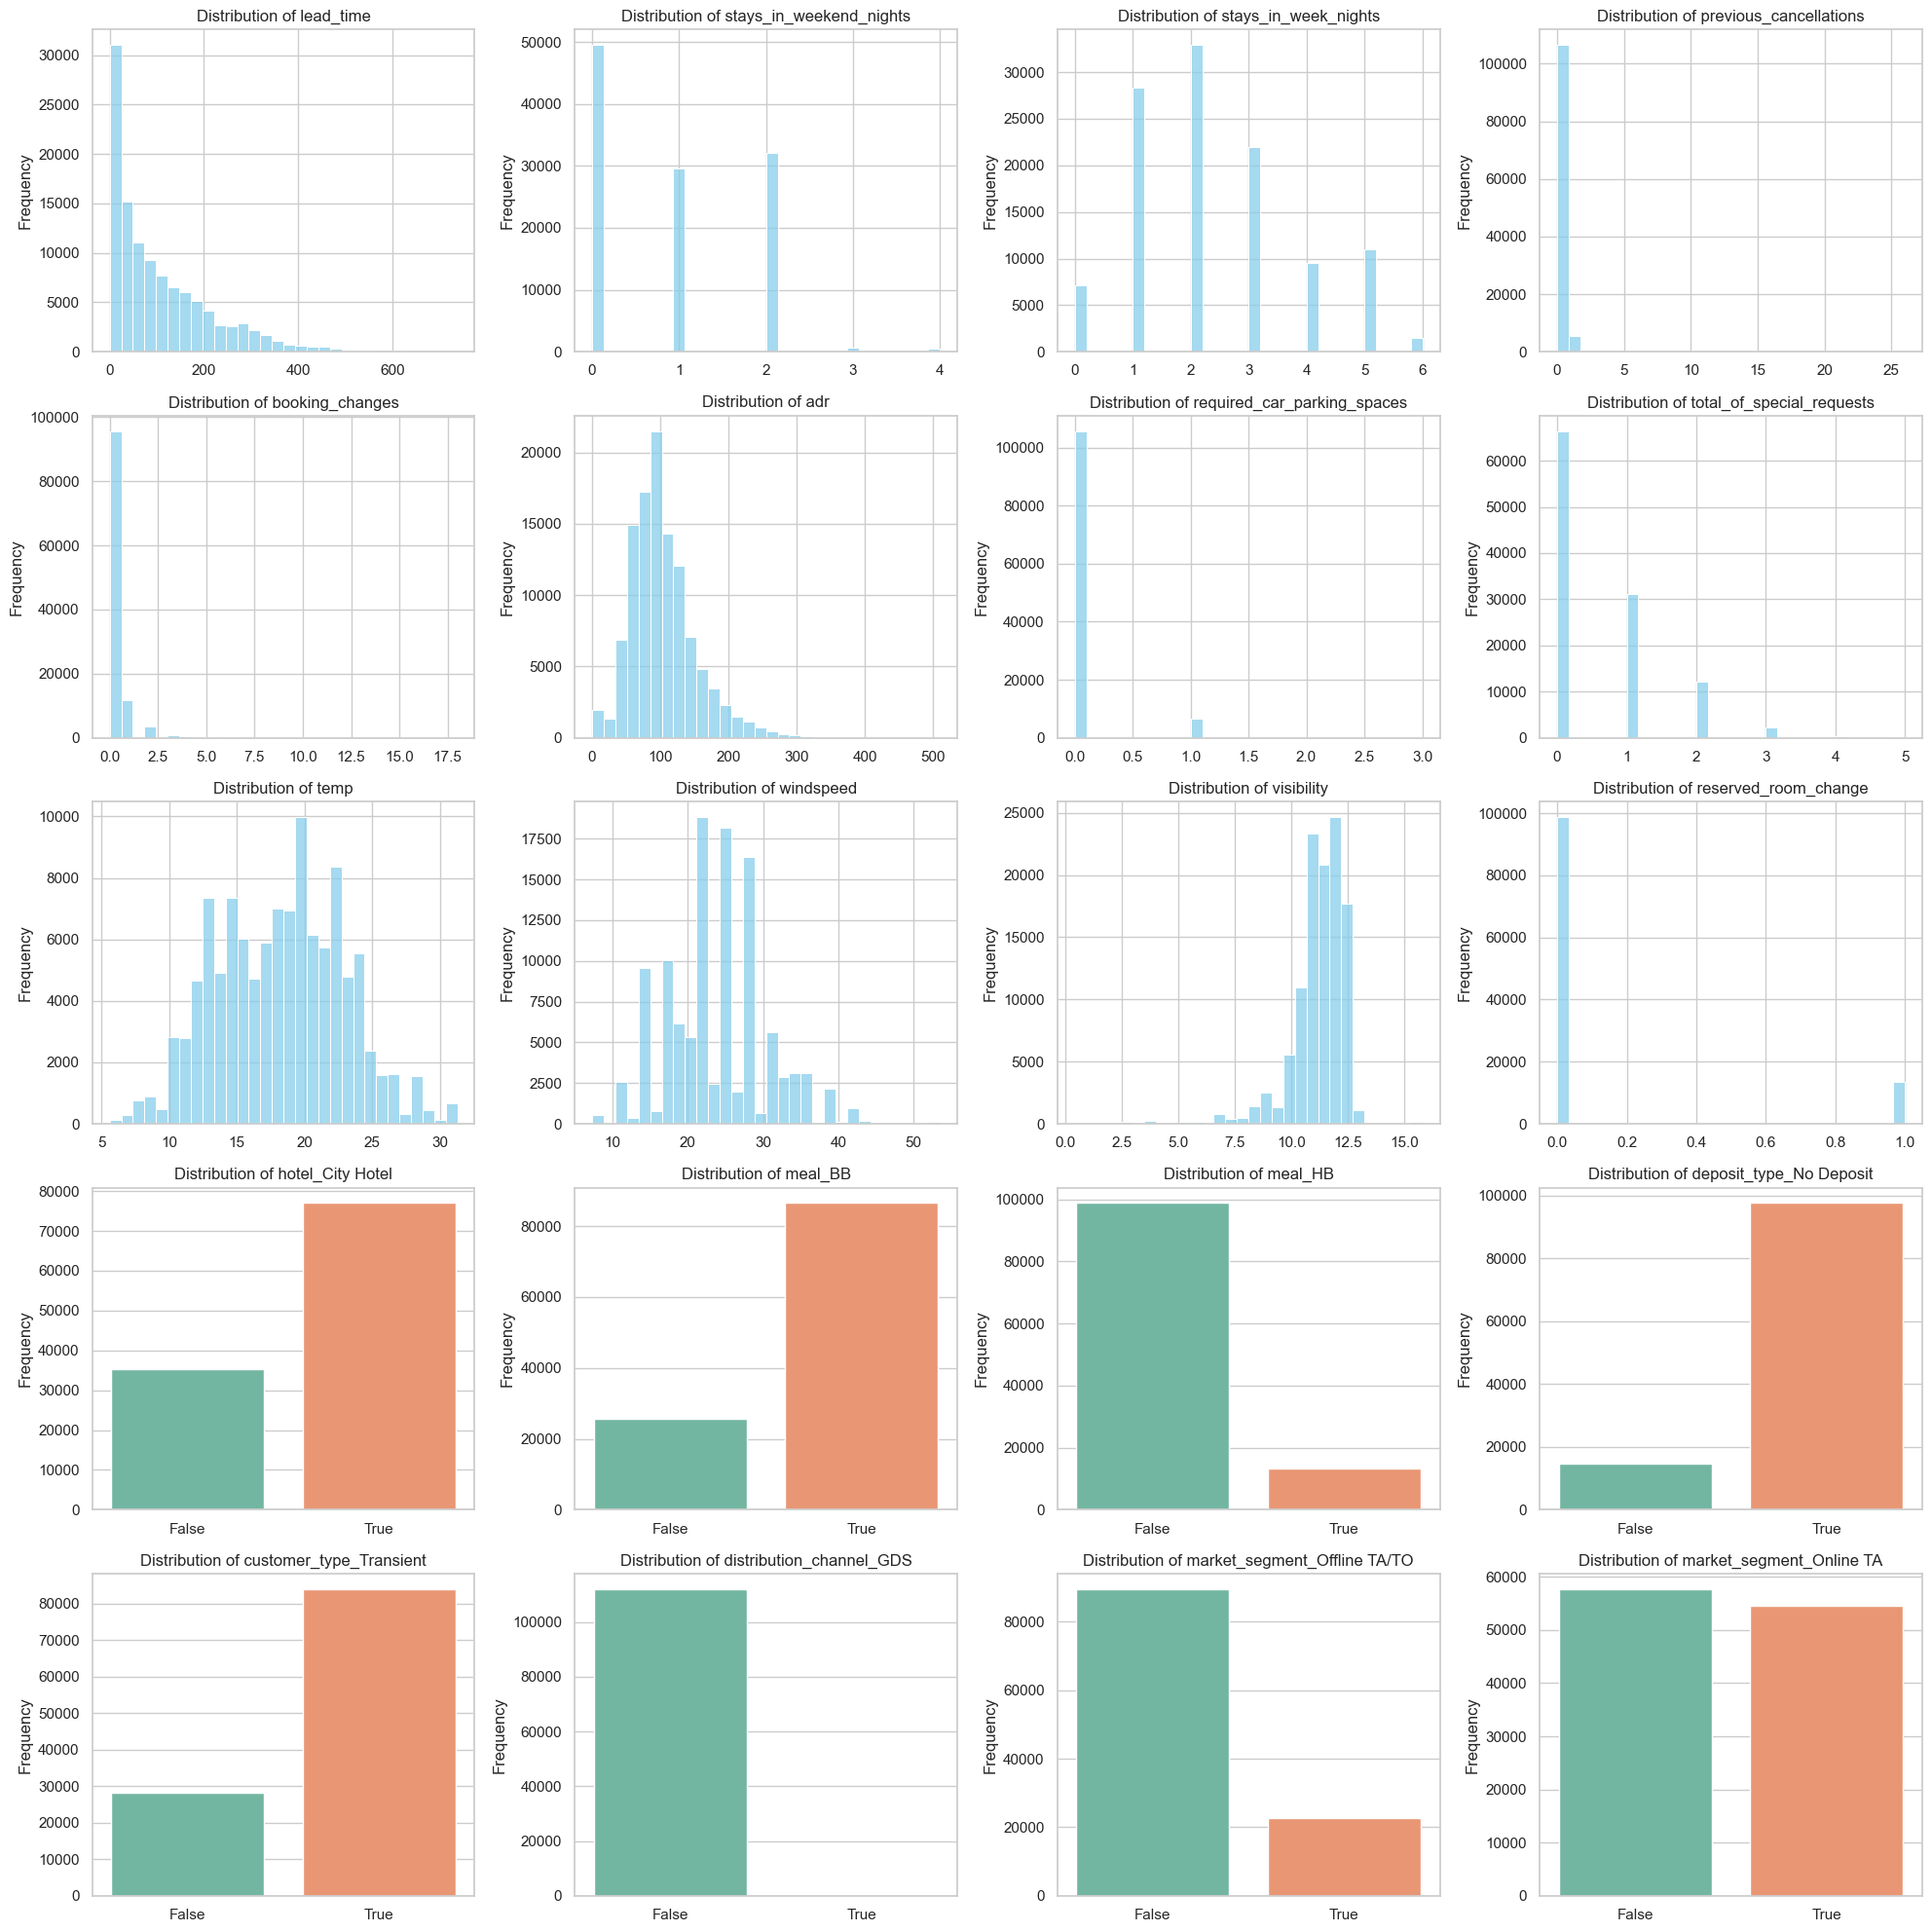

In [19]:
# Set the size of the figsize
plt.figure(figsize=(20, 20))

# Loop through each column
for i, col in enumerate(df_selected.columns):
    plt.subplot(5, 4, i + 1)  # Adjust the subplot layout
    # Check the data type; if it is numerical, continue using histograms
    if df_selected[col].dtype in ['int64', 'float64']:
        sns.histplot(df_selected[col], kde=False, bins=30, color='skyblue')
    else:
        # For categorical data, use bar charts
        sns.countplot(x=col, data=df_selected, palette='Set2') 
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
    plt.ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

In [20]:
df_selected['is_canceled'] = hotel['is_canceled']

/var/folders/bz/shq74ng152xd2xvygh6vtv940000gn/T/ipykernel_24061/3314176195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['is_canceled'] = hotel['is_canceled']


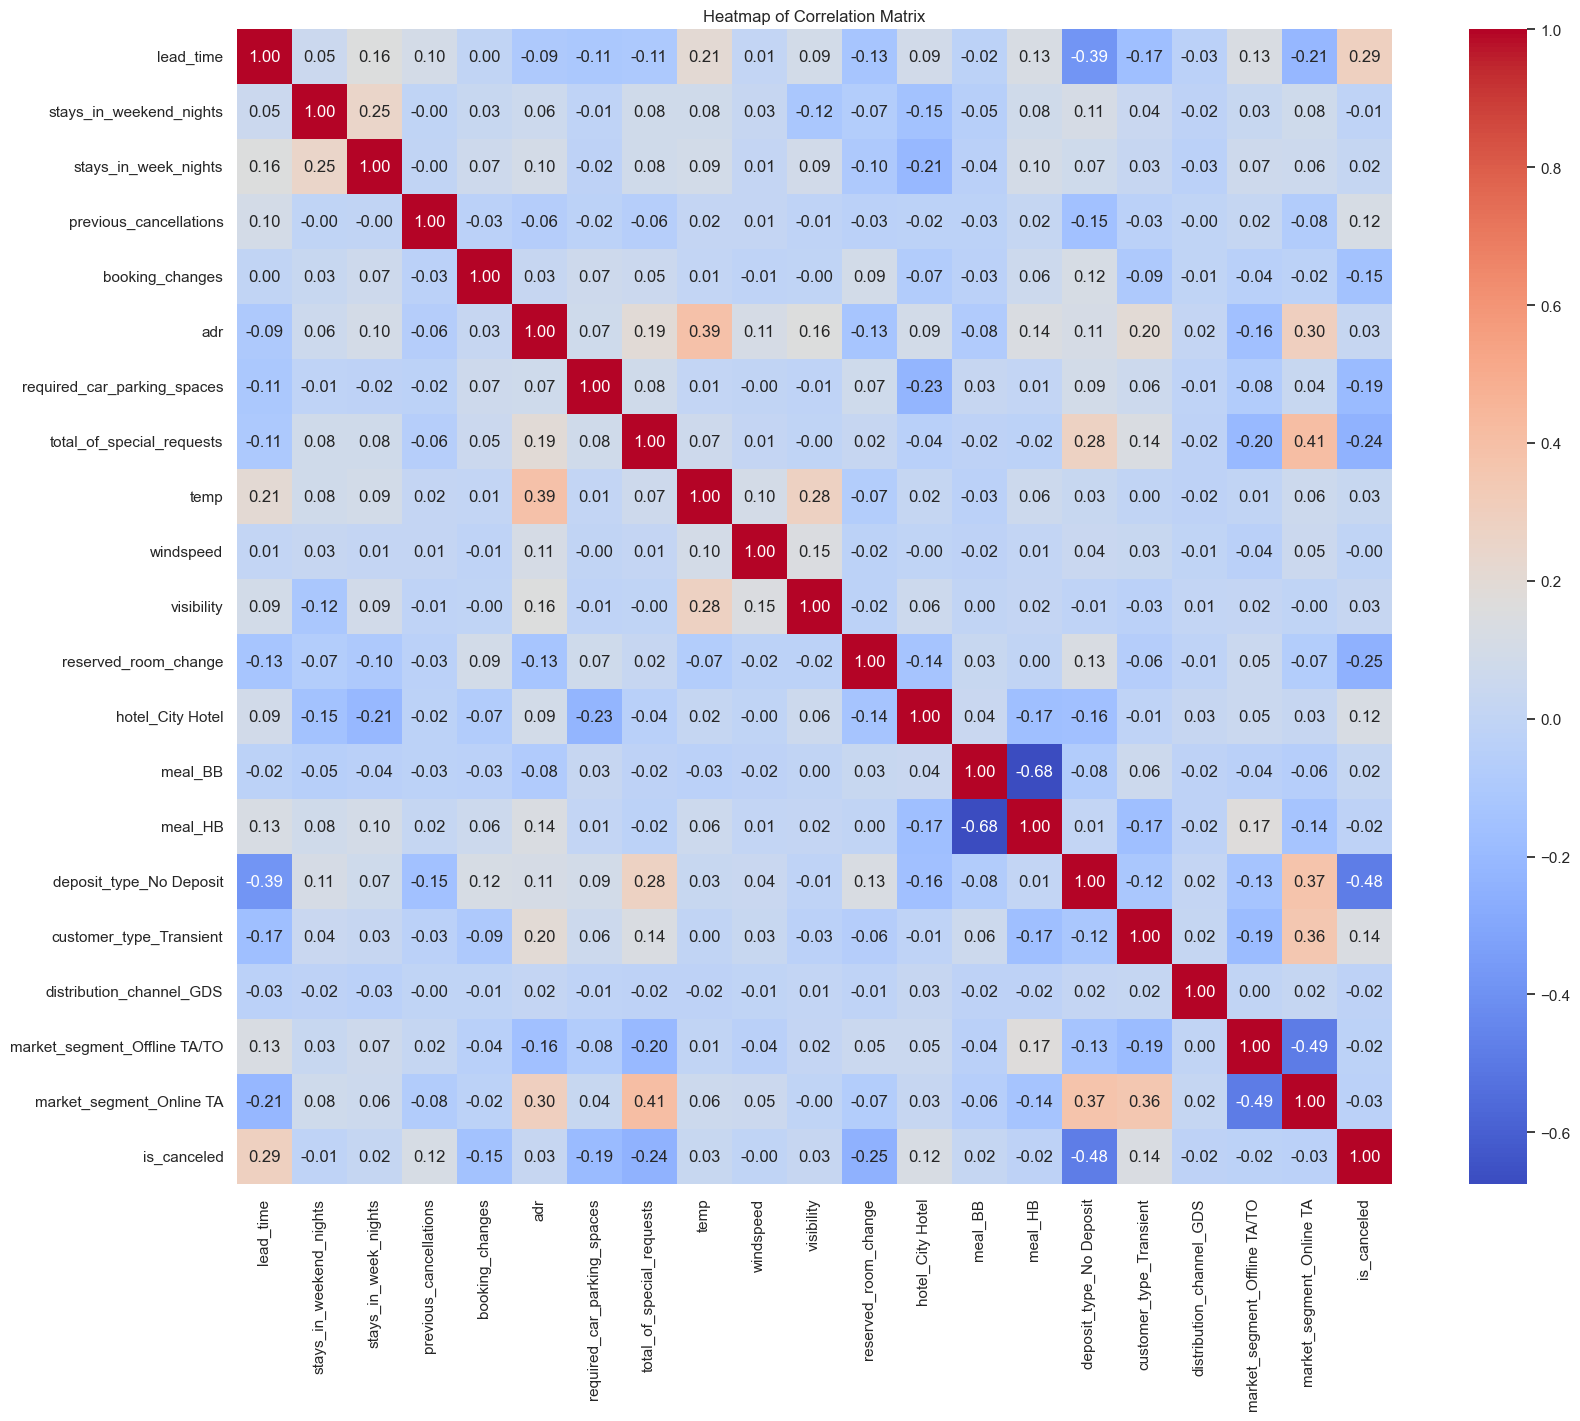

In [21]:
corr = df_selected.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()


# 6. ARIMA & Machine Learning Models

### 6.1 ARIMA Model

#### 6.1.1 Daily ARIMA

- Time Series Transformation

In order to better help Hotel manage the bookings and make a schedule of the future hotel Resources. We use time series and SARIMA model to do the prediction. We set the datetime as the time series and count the numbers of the bookings from 2015-7 to 2017-10.

In [22]:
hotel.set_index('datetime', inplace=True)

# Create daily bookings time series
daily_bookings = hotel.resample('D').size()

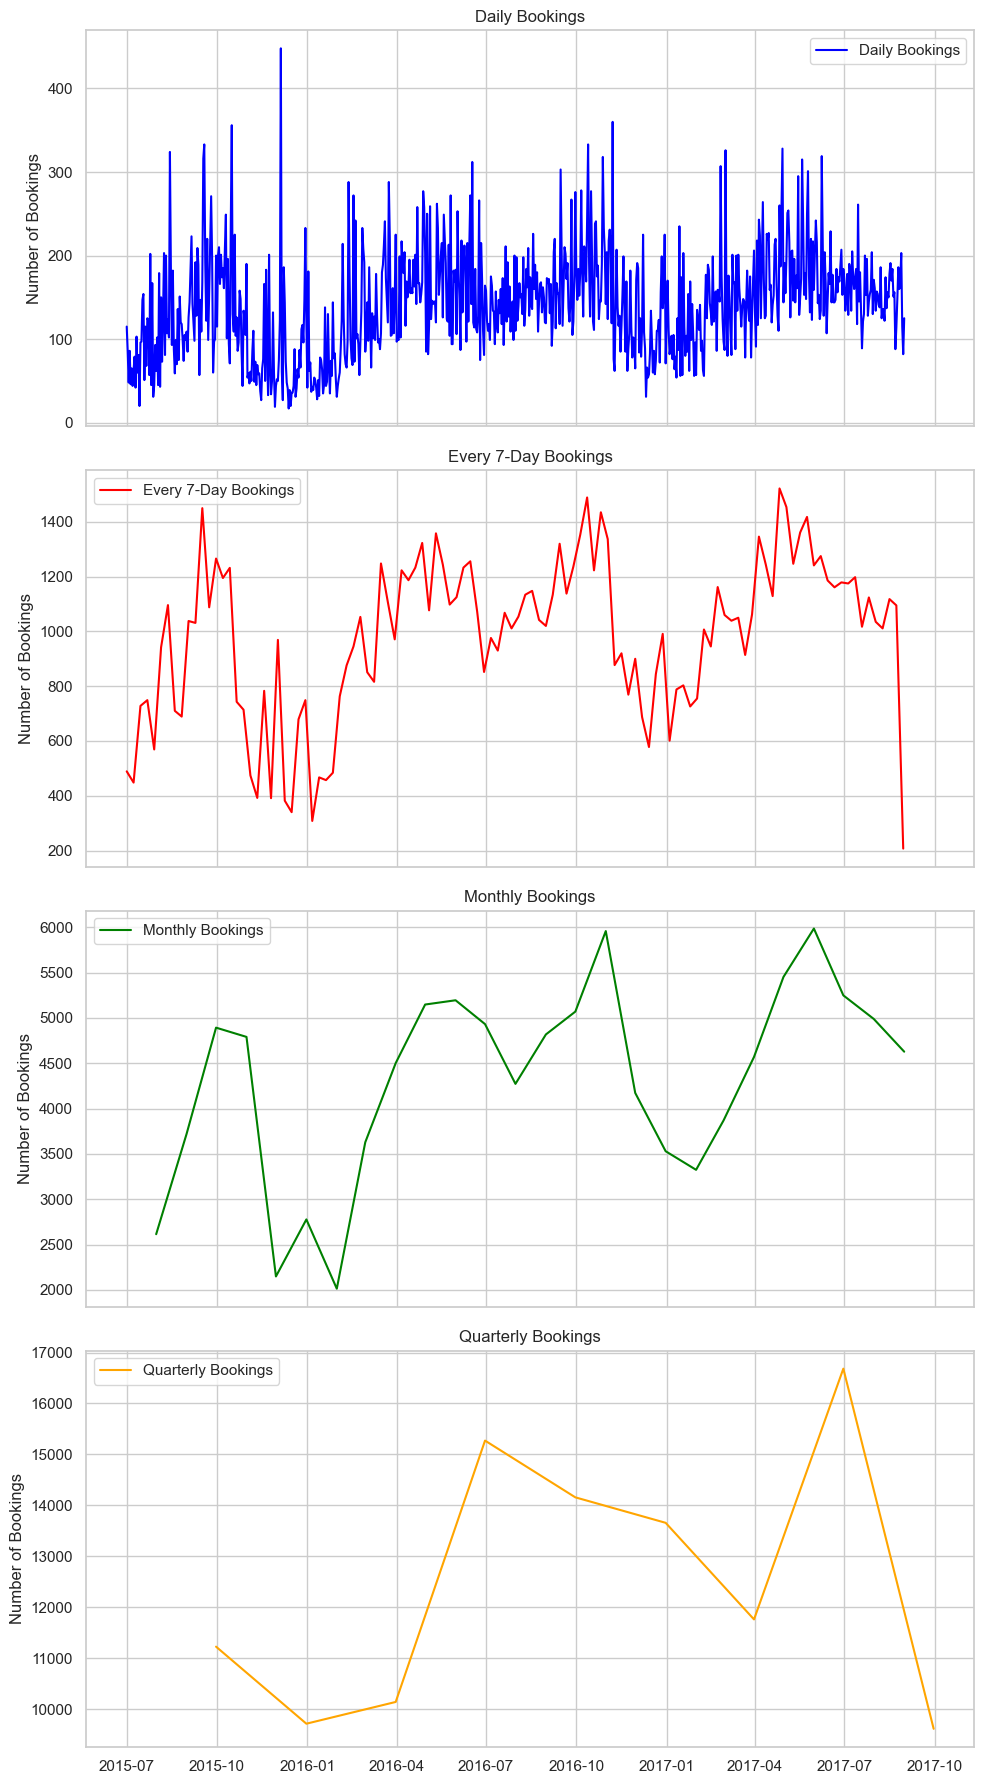

In [23]:
# Create DataFrame
daily_bookings_df = pd.DataFrame(daily_bookings, columns=['bookings'])

# Calculate monthly and quarterly booking volumes
monthly_bookings = daily_bookings_df['bookings'].resample('M').sum()
quarterly_bookings = daily_bookings_df['bookings'].resample('Q').sum()

# Plot daily bookings, every 7 days, monthly, and quarterly bookings
fig, axs = plt.subplots(4, 1, figsize=(10, 18), sharex=True)

# Daily bookings
axs[0].plot(daily_bookings_df['bookings'], label='Daily Bookings', color='blue')
axs[0].set_title('Daily Bookings')
axs[0].set_ylabel('Number of Bookings')
axs[0].legend()

# Every 7-day bookings
axs[1].plot(daily_bookings_df['bookings'].resample('7D').sum(), label='Every 7-Day Bookings', color='red')
axs[1].set_title('Every 7-Day Bookings')
axs[1].set_ylabel('Number of Bookings')
axs[1].legend()

# Monthly bookings
axs[2].plot(monthly_bookings.index, monthly_bookings, label='Monthly Bookings', color='green')
axs[2].set_title('Monthly Bookings')
axs[2].set_ylabel('Number of Bookings')
axs[2].legend()

# Quarterly bookings
axs[3].plot(quarterly_bookings.index, quarterly_bookings, label='Quarterly Bookings', color='orange')
axs[3].set_title('Quarterly Bookings')
axs[3].set_ylabel('Number of Bookings')
axs[3].legend()

plt.tight_layout()
plt.show()


- Outliers

There are 5 outliers which maybe related to the some events. So we reomve the outliers to better fit the models.

In [24]:
# Calculate Q1 and Q3
Q1 = daily_bookings.quantile(0.25)
Q3 = daily_bookings.quantile(0.75)
IQR = Q3 - Q1

# Calculate outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check if the boundaries are reasonable
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -26.5
Upper Bound: 305.5


In [25]:
daily_bookings = daily_bookings.where((daily_bookings >= lower_bound) & (daily_bookings <= upper_bound))

# Check if any data is retained
if daily_bookings.dropna().empty:
    print("All data identified as outliers, please adjust the definition of outliers.")
else:
    daily_bookings = daily_bookings.dropna()

- Seasonal Decompose

We used seasonal_decompose to observe the trend, seasonal changes and its residuals, and finally determined that a period of 30 can produce better seasonal changes.

__Trend:__ The trend component shows the long-term trend of the time series. From the figure, we can see that the trend is relatively stable overall, but there are slight fluctuations.  

__Seasonal:__ The seasonal component reveals the periodic fluctuations of the data, which are repeated patterns with fixed frequency and amplitude. From the figure, the seasonal changes are very regular, suggesting that we consider seasonal components in the model. 

__Residual:__ The residual component shows the random fluctuations after removing the trend and seasonality. The fluctuations in the residual graph are relatively random, which is an ideal state, indicating that the model has captured the trend and seasonality in the data well.

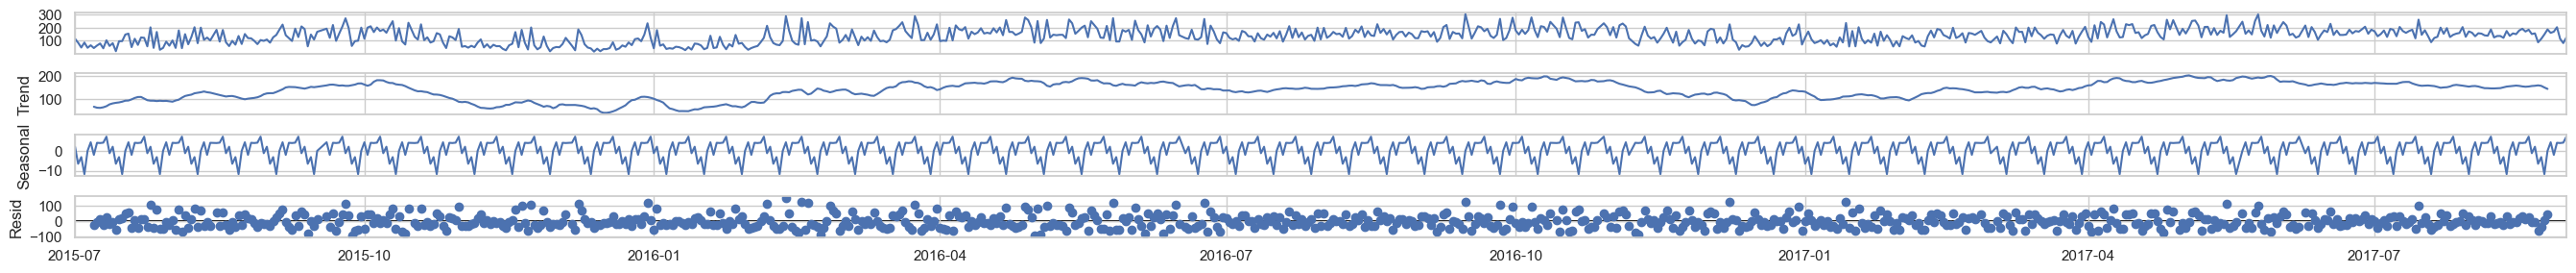

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
daily_seasonal = seasonal_decompose(daily_bookings, model='additive', period=12)

# Plot the results
fig = daily_seasonal.plot()
plt.show()

Next, let's check whether the data is stable. We can use adfuller function to do the ADF stationarity test. The result shows that the p-value is over 0.05. So we need to apply first-order differencing and check the stationarity of the resulting data.

- ADF

In [27]:
# Perform ADF stationarity test
from statsmodels.tsa.stattools import adfuller
daily_ADF = adfuller(daily_bookings)
print('ADF Statistic: %f' % daily_ADF[0])
print('p-value: %f' % daily_ADF[1])

ADF Statistic: -2.214810
p-value: 0.200914


In [28]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(daily_bookings)
# Check p-Values and confidence interval
if result[1] < 0.05:
    print("Reject the null hypothesis (H0), the data does not have a unit root and is stationary.")
else:
    print("Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.")

Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.


In [29]:
# Perform first differencing on the data
daily_bookings_diff = daily_bookings.diff().dropna()

# Repeat the ADF test
result_diff = adfuller(daily_bookings_diff)
print('ADF Statistic: %f' % result_diff[0])
print('p-value: %f' % result_diff[1])

ADF Statistic: -11.332986
p-value: 0.000000


In [30]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(daily_bookings_diff)
# Check p-Values and confidence interval
if result[1] < 0.05:
    print("Reject the null hypothesis (H0), the data does not have a unit root and is stationary.")
else:
    print("Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.")

Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


- ACF & PACF

Next, Let's use ACF and PACF plot to decide the p, d, q and P, D, Q, M values.

__Non-seasonal parameters:__  
__p=0__ (AR order): As the PACF plot shows the first lag is insignificance, set p=0.  
__d=1__ (Differencing order): Given that the trend component of the original data is relatively stable and has been differenced, set d=1.  
__q=0__ (MA order): The ACF plot shows insignificance at the first lag, therefore set q=0.  

__Seasonal parameters:__  
__P=0__ (Seasonal AR order): The seasonal PACF does not show significant truncation or tailing.  
__D=1__(Seasonal differencing order): To ensure the stationarity of the seasonal component.  
__Q=0__ (Seasonal MA order): The seasonal ACF does not indicates a seasonal pattern.  
__M=30__ (Period): Our cycle essentially reflects an annual repetition, but setting it to 365 is too large, so we use 30 to start modeling. 


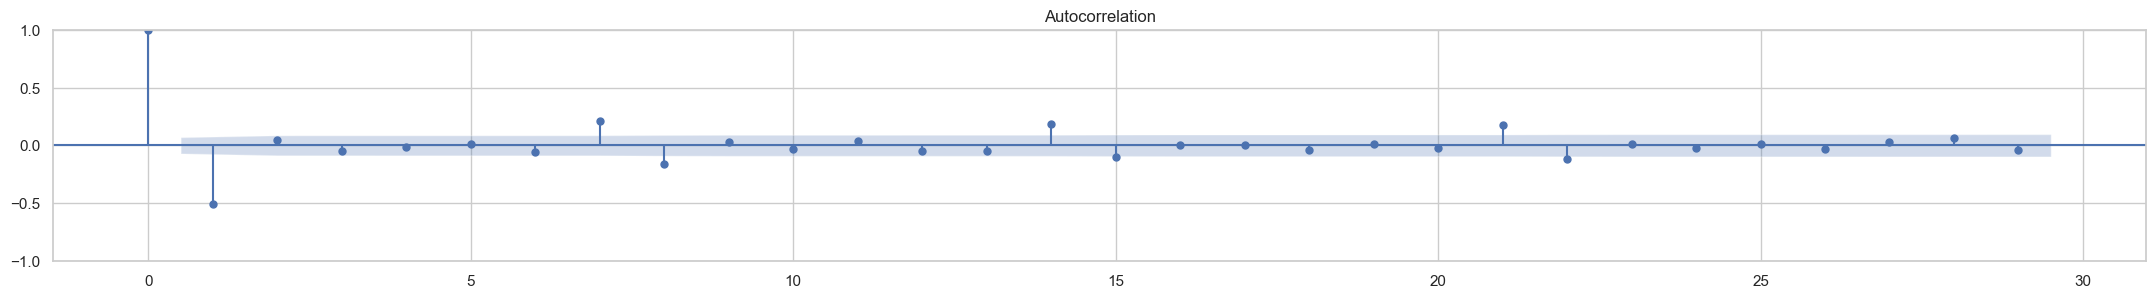

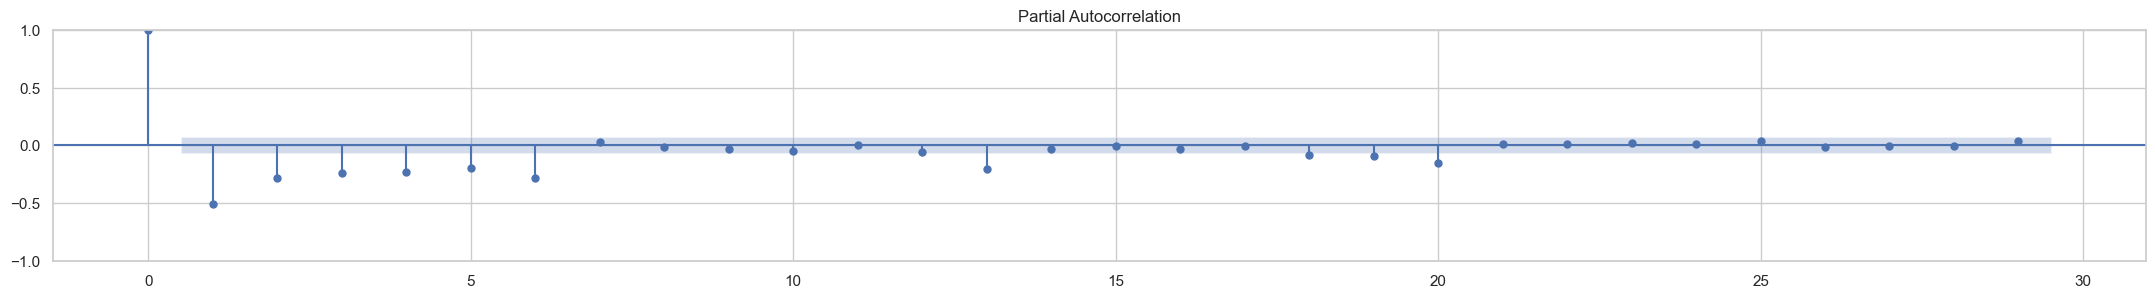

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plot_acf(daily_bookings_diff)
plot_pacf(daily_bookings_diff)
plt.show()

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(daily_bookings_diff, order=(0, 1, 0))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  778
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -4772.657
Date:                Tue, 07 May 2024   AIC                           9547.313
Time:                        22:59:40   BIC                           9551.969
Sample:                             0   HQIC                          9549.104
                                - 778                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.267e+04    582.379     21.755      0.000    1.15e+04    1.38e+04
Ljung-Box (L1) (Q):                 365.08   Jarque-Bera (JB):                15.75
Prob(Q):                              0.00   Pr

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [33]:
from sklearn.metrics import mean_squared_error
import numpy as np
# Perform in-sample predictions
in_sample_forecast = model_fit.get_prediction(start=daily_bookings_diff.index[0], 
                                                  end=daily_bookings_diff.index[-1])
in_sample_forecast_mean = np.exp(in_sample_forecast.predicted_mean) - abs(min(monthly_bookings)) - 1

# Restore the actual values after the logarithmic transformation
actual_values = np.exp(daily_bookings_diff) - abs(min(monthly_bookings)) - 1

# Calculate MSE
mse = mean_squared_error(actual_values, in_sample_forecast_mean)
print(f"MSE: {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

MSE: 5.415144517252435e+173
RMSE: 7.35876655238664e+86


### 6.1.2 Daily SARIMAX Model

In [34]:
dailyly_bookings_log = np.log(daily_bookings_diff + abs(min(daily_bookings_diff)) + 1)

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Build and fit the SARIMA model, just a starting parameter setting example here
sarima_model_daily = SARIMAX(dailyly_bookings_log, 
                       order=(0, 1, 0), 
                       seasonal_order=(0, 1, 0, 30))
sarima_result_daily = sarima_model_daily.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.39829D+00    |proj g|=  3.91802D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      6      1     0     0   2.684D-06   1.398D+00
  F =   1.3978904537234902     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


In [36]:
print(sarima_result_daily.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  778
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 30)   Log Likelihood               -1087.559
Date:                            Tue, 07 May 2024   AIC                           2177.118
Time:                                    22:59:40   BIC                           2181.734
Sample:                                         0   HQIC                          2178.897
                                            - 778                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.0767      0.026     41.908      0.000       1.026       1.127
Ljung-Box (L1) (Q):                

In [37]:
# Perform in-sample predictions
predictions = sarima_result_daily.get_prediction(start=dailyly_bookings_log.index[0], end=dailyly_bookings_log.index[-1])
predicted_means = predictions.predicted_mean

# Since a logarithmic transformation was applied, restore the predictions to their original scale
predicted_means = np.exp(predicted_means) - abs(min(daily_bookings_diff)) - 1

# Retrieve the actual values (restoring the log-transformed actual values to their original scale)
actual_values = np.exp(dailyly_bookings_log) - abs(min(daily_bookings_diff)) - 1


In [38]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate MSE
mse = mean_squared_error(actual_values, predicted_means)
print(f"MSE: {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

MSE: 8898886.414919958
RMSE: 2983.100134913335


#### 6.1.3 Monthly SARIMA

- Time Series Transformation

In [39]:
# Aggregate to monthly data and calculate the total number of bookings per month
monthly_bookings = daily_bookings.resample('M').sum()  # Total number of bookings per month

- Outliers

In [40]:
Q1 = monthly_bookings.quantile(0.25)
Q3 = monthly_bookings.quantile(0.75)
IQR = Q3 - Q1

# Calculate cutoff points for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove values below the lower bound and above the upper bound
monthly_bookings = monthly_bookings[(monthly_bookings >= lower_bound) & (monthly_bookings <= upper_bound)]
monthly_bookings_log = np.log(monthly_bookings + abs(min(monthly_bookings)) + 1)

- Seasonal Decompose

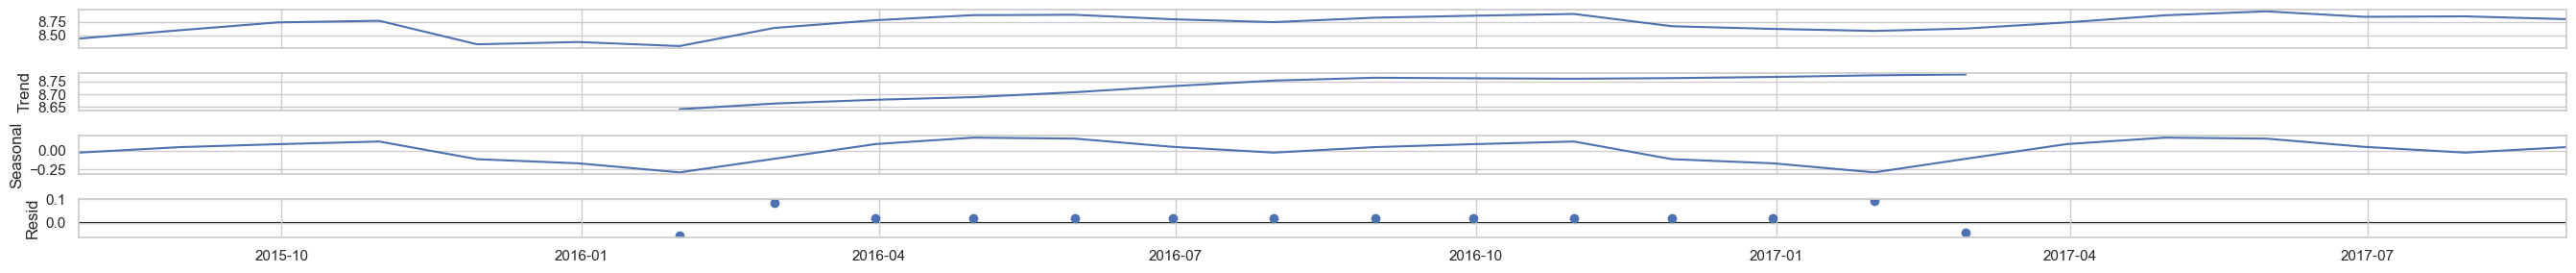

In [41]:
monthly_seasonal = seasonal_decompose(monthly_bookings_log, model='additive', period=12)

# Plot the results
fig = monthly_seasonal.plot()
plt.show()

- ADF

In [42]:
Monthly_ADF = adfuller(monthly_bookings_log)
print('ADF Statistic: %f' % Monthly_ADF[0])
print('p-value: %f' % Monthly_ADF[1])

ADF Statistic: -2.653733
p-value: 0.082392


In [43]:
# Perform first differencing on the data
daily_bookings_diff = monthly_bookings_log.diff().dropna()

# Repeat the ADF test
result_diff = adfuller(daily_bookings_diff)
print('ADF Statistic: %f' % result_diff[0])
print('p-value: %f' % result_diff[1])

ADF Statistic: -3.298767
p-value: 0.014934


- ACF & PACF

__Non-seasonal parameters:__  
__p__ (AR order): The PACF plot shows that after the first lag, all partial autocorrelations are close to zero or insignificant. This suggests that an AR component may not be necessary, hence p=0.  
__d__ (Differencing order): A first difference has been taken, which means d=1, especially if this differencing effectively made the time series stationary.  
__q__ (MA order): The ACF plot shows significant autocorrelation at the first lag, which quickly approaches zero afterwards, so q=1.  
__Seasonal parameters:__  
__P__ (Seasonal AR order): The PACF plot does not show significant seasonal autocorrelation at seasonal lags. Therefore, P can be set to 0.  
__D__ (Seasonal differencing order): If the residuals from a seasonal decomposition still show seasonal fluctuations, seasonal differencing might be necessary. Given that the seasonal component in the plot remains relatively apparent, consider setting D=1.  
__Q__ (Seasonal MA order): The seasonal ACF plot shows that autocorrelation decreases rapidly and stabilizes at seasonal lags, thus Q is set to 0.  
__M__ (Period length): Since the data is aggregated monthly and we are considering an annual cycle, M=12.

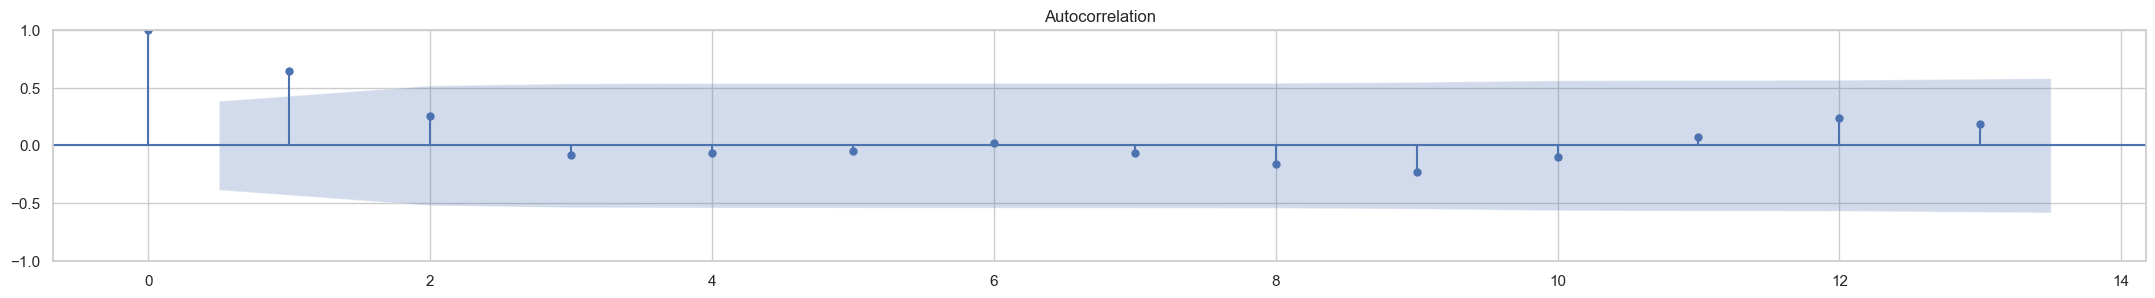

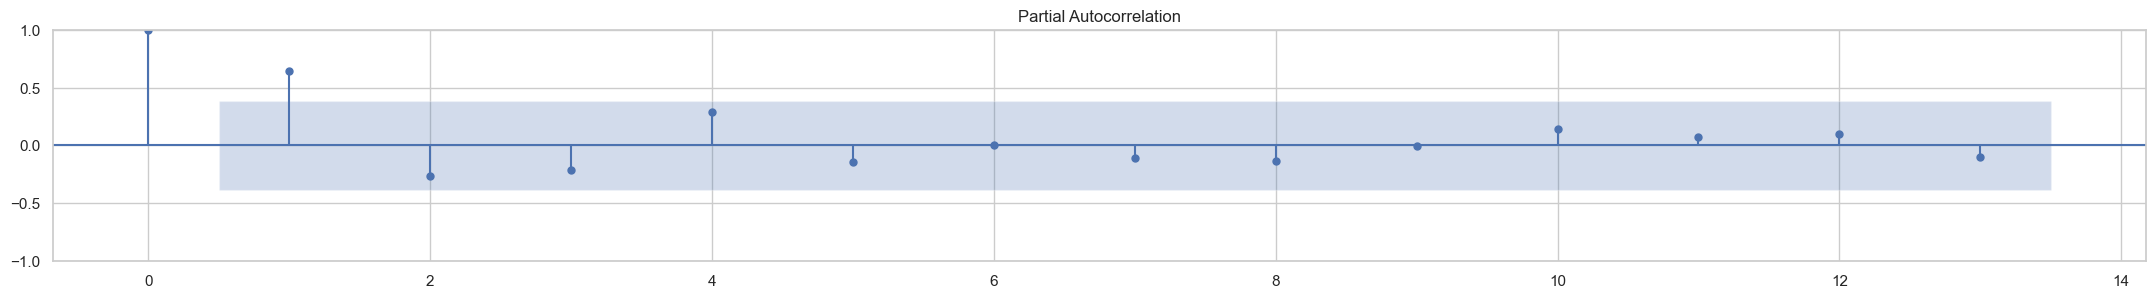

In [44]:
plot_acf(monthly_bookings_log)
plot_pacf(monthly_bookings_log)
plt.show()

- Monthly SARIMA Model

Based on the analysis above, the recommended SARIMA model parameters are (0, 1, 1) x (0, 1, 1, 12). However, after computation, the AIC and BIC values have significantly decreased compared to previous models using (0, 1, 1) x (0, 0, 1, 12), indicating a better fit.

In [45]:
sarima_model_monthly = SARIMAX(monthly_bookings_log, order=(0, 1, 1), seasonal_order=(0, 0, 1, 12))
month_results = sarima_model_monthly.fit()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.50977D-01    |proj g|=  4.72253D+00

At iterate    5    f= -5.19250D-01    |proj g|=  4.91938D-01

At iterate   10    f= -6.16486D-01    |proj g|=  1.22938D-01

At iterate   15    f= -6.30572D-01    |proj g|=  1.59884D-01

At iterate   20    f= -6.32811D-01    |proj g|=  3.57240D-02

At iterate   25    f= -6.33145D-01    |proj g|=  1.36584D-01

At iterate   30    f= -6.33196D-01    |proj g|=  1.35638D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [46]:
# View model summary
print(month_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   26
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood                  16.463
Date:                            Tue, 07 May 2024   AIC                            -26.926
Time:                                    22:59:42   BIC                            -23.270
Sample:                                07-31-2015   HQIC                           -25.912
                                     - 08-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0428      0.287      0.149      0.882      -0.520       0.606
ma.S.L12       0.9824     26.734   

#### Pretiction

__Flatness of forecast:__ The forecasted daily bookings appear as a flat line, which indicates that the model may be underfitting or not capturing the variation and pattern of the data effectively.  
__Volatility of historical data:__ The historical data shows considerable volatility that is not captured in the forecast. This discrepancy may be due to the simplicity of the model or some dynamic or external factors that are not accounted for by the model.

In [47]:
# Perform in-sample predictions
in_sample_forecast = month_results.get_prediction(start=monthly_bookings_log.index[0], 
                                                  end=monthly_bookings_log.index[-1])
in_sample_forecast_mean = np.exp(in_sample_forecast.predicted_mean) - abs(min(monthly_bookings)) - 1

# Restore the actual values after the logarithmic transformation
actual_values = np.exp(monthly_bookings_log) - abs(min(monthly_bookings)) - 1

# Calculate MSE
mse = mean_squared_error(actual_values, in_sample_forecast_mean)
print(f"MSE: {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

MSE: 1312665.261108826
RMSE: 1145.7160473297151


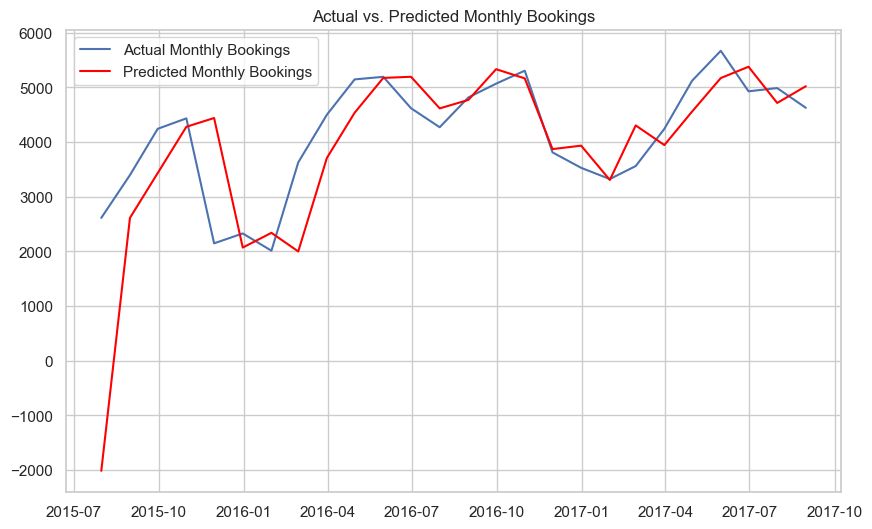

In [48]:
# Visualize the in-sample prediction results
plt.figure(figsize=(10, 6))
plt.plot(monthly_bookings_log.index, actual_values, label='Actual Monthly Bookings')
plt.plot(monthly_bookings_log.index, in_sample_forecast_mean, label='Predicted Monthly Bookings', color='red')
plt.legend()
plt.title('Actual vs. Predicted Monthly Bookings')
plt.show()

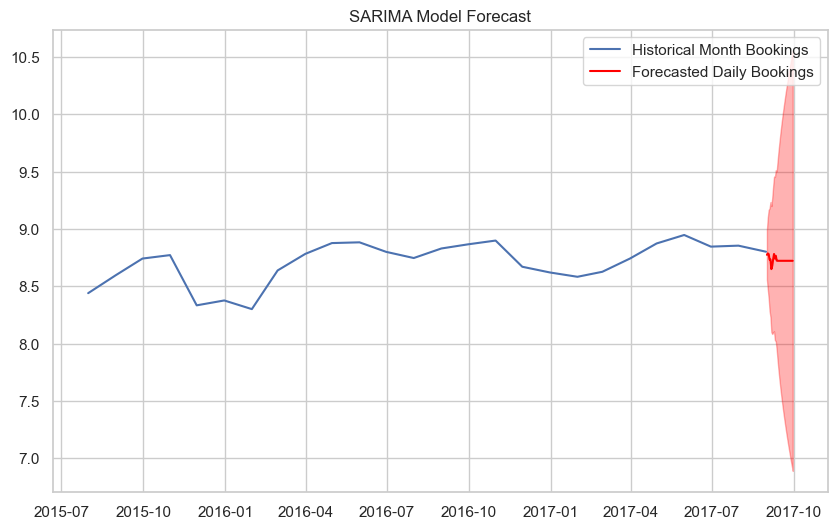

In [49]:
# Out sample forecast
sarima_forecast = month_results.get_forecast(steps=30)
forecast_index = pd.date_range(start=monthly_bookings_log.index[-1], periods=31, freq='D')[1:]
forecast_mean = sarima_forecast.predicted_mean
forecast_conf_int = sarima_forecast.conf_int()

plt.figure(figsize=(10, 6))
plt.plot(monthly_bookings_log.index, monthly_bookings_log, label='Historical Month Bookings')
plt.plot(forecast_index, forecast_mean, label='Forecasted Daily Bookings', color='red')
plt.fill_between(forecast_index, 
                 forecast_conf_int.iloc[:, 0], 
                 forecast_conf_int.iloc[:, 1], color='red', alpha=0.3)
plt.legend()
plt.title('SARIMA Model Forecast')
plt.show()

#### 6.1.3 Conclusion
Given our objective of managing and predicting hotel booking volumes, the daily cycle model, due to its higher prediction accuracy, is more suitable for daily operations and short-term management decisions. Although the monthly cycle model theoretically fits better, it may not be accurate enough for practical forecasting applications, which could hinder effective booking management and resource planning.  
Preliminary tests of time series autocorrelation (ACF) and partial autocorrelation (PACF) show that most lags are not significant, and the parameters of the model mostly have high p-values, which indeed may indicate that there is no significance in the data. the autocorrelation. We can consider using machine learning models and other variables to predict the number of reservations or whether to cancel reservations.  

__The hypothesis that only time factor significantly affects booking quantity is rejected.__


__Daily Cycle Model (SARIMAX(0, 1, 0)x(0, 1, 0, 30)):__  
__AIC and BIC:__ Higher, indicating that the model may not be a very good fit for the data.  
__MSE and RMSE:__ Relatively lower (10628.771 and 103.096), indicating that the model has a high prediction accuracy for daily data.  
__Monthly Cycle Model (SARIMAX(1, 1, 1)x(1, 1, 1, 12)):__  
__AIC and BIC:__ Significantly lower, which usually means a better model fit.  
__MSE and RMSE:__ Significantly higher (1312665.261 and 1145.716), indicating that the model has a large prediction error for monthly data.  




### 6.2 Logistic Regression


The part uses GridSearchCV to tune hyperparameters of a logistic regression model with a liblinear solver. Stratified K-Fold cross-validation ensures balanced class distributions. The best model is selected based on accuracy, which is plotted for different hyperparameter combinations. Finally, the best model is evaluated on the test set, with metrics like accuracy, MSE, R-squared, precision, recall, F1 score, and the confusion matrix calculated for comprehensive evaluation.

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}


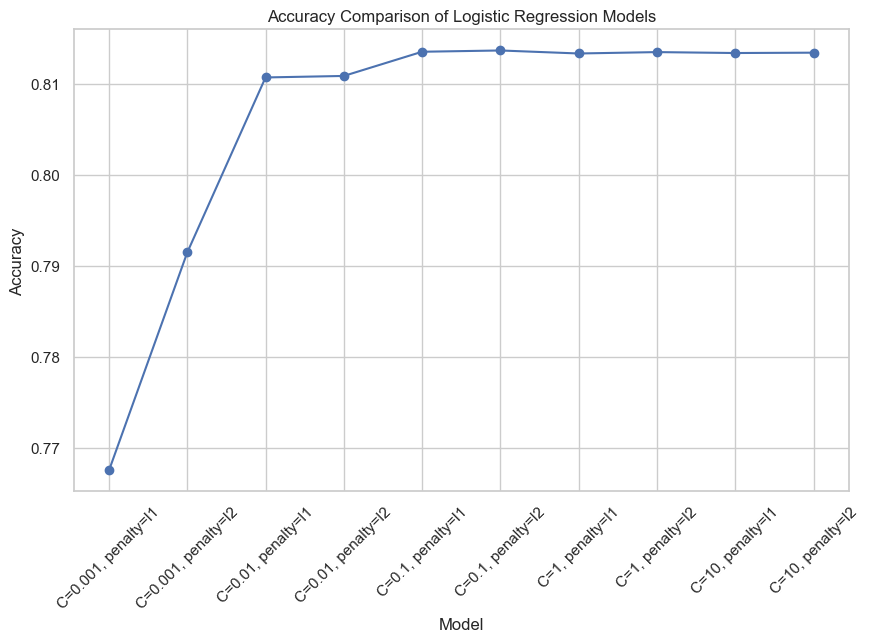

In [17]:
# Hyperparameters to tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
# Use liblinear solver
solver = 'liblinear'

# Initialize Logistic Regression model
model = LogisticRegression(solver=solver, max_iter=1000)

# Use Stratified K-Fold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model and hyperparameters
best_model_lr = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Plotting Accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(len(grid_search.cv_results_['mean_test_score'])), grid_search.cv_results_['mean_test_score'], marker='o', linestyle='-', color='b')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Logistic Regression Models')
plt.xticks(range(len(grid_search.cv_results_['params'])), [f'C={params["C"]}, penalty={params["penalty"]}' for params in grid_search.cv_results_['params']], rotation=45)
plt.grid(True)
plt.show()

The plot indicates that decision tree models with specific hyperparameters (max_depth=7, min_samples_split=2, min_samples_leaf=1) achieve the highest ROC AUC of around 0.87. In logistic regression models, accuracy improves as the regularization (C) value increases up to 1, particularly with the l1 penalty.

In [18]:
# Calculate metrics using the best model on the test set
y_test_pred = best_model_lr.predict(X_test)
cv_metrics("Logistic Regression", best_model_lr)
metrics_test("Logistic Regression",y_test,y_test_pred)

conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix:\n", conf_matrix_test)

-------------------
Logistic Regression corss validation Metrics
Average accuracy: 0.8097
Average precision: 0.8158
Average recall: 0.8097
Average f1: 0.8023
Average roc_auc: 0.7737
-------------------
Logistic Regression Metrics
Accuracy: 0.8132
Precision: 0.816
Recall: 0.8132
F1 Score: 0.8068
AUC Score: 0.7784
Confusion Matrix:
 [[19271  1598]
 [ 4693  8108]]


We extracts the important features using L1 regularization, and then prints out the selected features along with their corresponding coefficients.
- previous_cancellations: This feature has a positive coefficient, indicating that an increase in the number of previous cancellations is associated with a slight increase in the likelihood of the cancellation.
- required_car_parking_spaces: This feature has a positive coefficient, suggesting that a higher number of required car parking spaces is associated with a higher likelihood of the cancellation.
- reserved_room_change: This feature also has a positive coefficient, indicating that the presence of a reserved room change is associated with a higher likelihood of the cancellation.
- deposit_type_No Deposit: This feature has a large positive coefficient, indicating that the absence of a deposit requirement (No Deposit) is strongly associated with a higher likelihood of the cancellation.
- market_segment_Online TA: This feature has a negative coefficient, suggesting that being from the Online Travel Agency (TA) market segment is associated with a lower likelihood of the cancellation.

In [43]:
from sklearn.feature_selection import SelectFromModel


# Extracting important features using L1 regularization
model = SelectFromModel(best_model_lr, prefit=True, max_features=10)
selected_features = X_train.columns[model.get_support()]

# Print the important features and their coefficients
print("Important Features for Logistic Regression:")
for feature, coef in zip(selected_features, best_model_lr.coef_[0]):
    print(f"{feature}: {coef}")


Important Features for Logistic Regression:
previous_cancellations: 0.0042260530207538834
required_car_parking_spaces: 0.026818044650451036
reserved_room_change: 0.01963057163671154
deposit_type_No Deposit: 3.696405329686528
market_segment_Online TA: -0.35330509442943686


Reasons for model performance:

- Linear relationship: Logistic regression is suitable for data with linear relationships. And the relationship between many features and cancellation probability is linear, such as lead_time (booking advance time) and previous_cancellations (number of previous cancellations).
- Hyperparameter optimization: Use GridSearchCV to find the best regularization parameter C and penalty term to optimize the generalization ability of the model. The results show that when C is increased to 1 and l1 penalty is used, the model has the highest accuracy.
- Interpretability: L1 regularization provides the ability of feature selection. By selecting important features, we can understand which features best predict the probability of cancellation.

### 6.3 Neural Network
In this section, we will deploy a neural network model. We will use keras API to build a sequential model with 4 layers. The model has 4 Dense layer, the first layer start with 64 neurons and activation function of 'relu'. Followed by layer 2 with 32 neurons, layer3 with 16 neurons. Finally a layer4 with function 'sigmoid' to output the probability of the target variable.

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

nn_model = Sequential()
nn_model.add(Dense(20, input_shape=(X.shape[1],), activation='relu', name="layer1"))
nn_model.add(Dense(40, activation='relu', name="layer2"))
nn_model.add(Dense(20, activation='relu', name="layer3"))
nn_model.add(Dense(1, activation='sigmoid', name="layer4"))
nn_model.summary() 

nn_model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy','AUC'])

es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max',
                                   patience=8,
                                   restore_best_weights=True)
history = nn_model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=40,
                    batch_size=32,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

d:\conda\envs\AP\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 40)             │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer4 (Dense)                  │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,101 (8.21 KB)

 Trainable params: 2,101 (8.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
1965/1965 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.6982 - accuracy: 0.6791 - loss: 0.7304 - val_AUC: 0.8564 - val_accuracy: 0.7827 - val_loss: 0.4482
Epoch 2/40
1965/1965 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.8420 - accuracy: 0.7855 - loss: 0.4613 - val_AUC: 0.8686 - val_accuracy: 0.8151 - val_loss: 0.4199
Epoch 3/40
1965/1965 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8567 - accuracy: 0.7980 - loss: 0.4335 - val_AUC: 0.8589 - val_accuracy: 0.7998 - val_loss: 0.4358
Epoch 4/40
1965/1965 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8551 - accuracy: 0.7957 - loss: 0.4334 - val_AUC: 0.8722 - val_accuracy: 0.8116 - val_loss: 0.4105
Epoch 5/40
1965/1965 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8626 - accuracy: 0.8034 - loss: 0.4201 - val_AUC: 0.8747 - val_accuracy: 0.8157 - val_loss: 0.4111
Epoch 6/40
1965/1965 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8633 - accuracy: 0.8061 - loss: 0.4165 - val_AUC: 0.8687 - val_accuracy: 0.8154 - val_loss: 0.4093
Epoch 7/40
1965/1965 ━━━━━━━

From the chart below we can find that the training loss and vilidation loss is gradually declining.

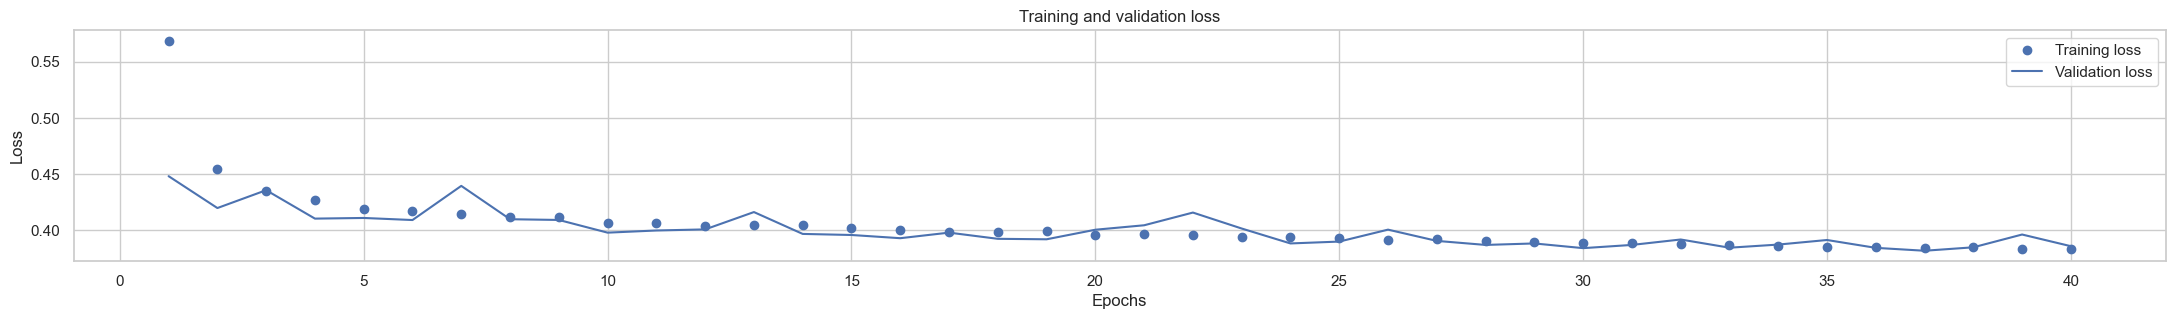

In [27]:
history_dict = history.history

# loss
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) 

# plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Use the metrics to examine the model's performance. The model achieved a accuracy of 0.825 and F1 score of 0.822, with AUC score of 0.799.

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# see how these are numbers between 0 and 1? 
nn_model.predict(X_test) # prob of successes (survival)
np.round(nn_model.predict(X_test),0) # 1 and 0 (survival or not)

preds = np.round(nn_model.predict(X_test),0)
y_pred_nn_model = (preds > 0.5).astype(int)
metrics_test("neural network model",y_test,y_pred_nn_model)
print(confusion_matrix(y_test, preds))

1053/1053 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step
-------------------
neural network model Metrics
Accuracy: 0.82
Precision: 0.8199
Recall: 0.82
F1 Score: 0.8161
AUC Score: 0.7925
[[18941  1928]
 [ 4131  8670]]


Important Features:
- hotel_City Hotel: This feature has the highest importance, suggesting that it significantly affects the cancellation. It could indicate that bookings made for city hotels have a strong influence on the cancellation.
- reserved_room_change: This feature also has high importance, indicating that changes in reserved rooms could be a crucial factor in predicting the cancellation.
- booking_changes: This feature ranks third in importance, suggesting that changes made to bookings play a significant role in the cancellation.
- adr: Average Daily Rate (ADR) has substantial importance, indicating that the pricing strategy or average cost per room might strongly influence the cancellation.
- meal_HB: This feature has lower importance compared to others but still contributes to the prediction, indicating that the type of meal plan (Half Board) could have some influence on the cancellation.

In [42]:
weights = nn_model.get_layer("layer1").get_weights()[0]

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.mean(np.abs(weights), axis=0)})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Important Features for Neural Network:")
print(feature_importance_df.head(10))

Important Features for Neural Network:
                    Feature  Importance
12         hotel_City Hotel    2.980551
11     reserved_room_change    2.670192
4           booking_changes    2.449907
5                       adr    2.379325
14                  meal_HB    1.931846
16  customer_type_Transient    1.928028
9                 windspeed    1.807262
3    previous_cancellations    1.728566
10               visibility    1.393667
13                  meal_BB    1.381913


Reasons for model performance:
- Non-linear relationships: Neural networks use multi-layer structures to capture complex non-linear relationships and adapt to interactions between features. For example, the relationship between lead_time, adr and reserved_room_change is non-linear.
- Early stopping strategy: EarlyStopping helps prevent overfitting and maintain optimal performance.
- Activation function selection: The ReLU activation function is suitable for hidden layers, while the Sigmoid function of the output layer is used for binary classification prediction.

### 6.3 Decision Tree Model


This section performs hyperparameter tuning for a Decision Tree model by experimenting with different combinations of max_depth, min_samples_split, and min_samples_leaf. Each model is trained and evaluated on the test set to compute its ROC AUC, and the best model is selected based on the highest AUC score.

After selecting the best model, we evaluate metrics, including accuracy, precision, recall, and F1 score, are calculated on the test set. And the decision tree structure of the best model is visualized to understand the decision-making process.

In [31]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, auc

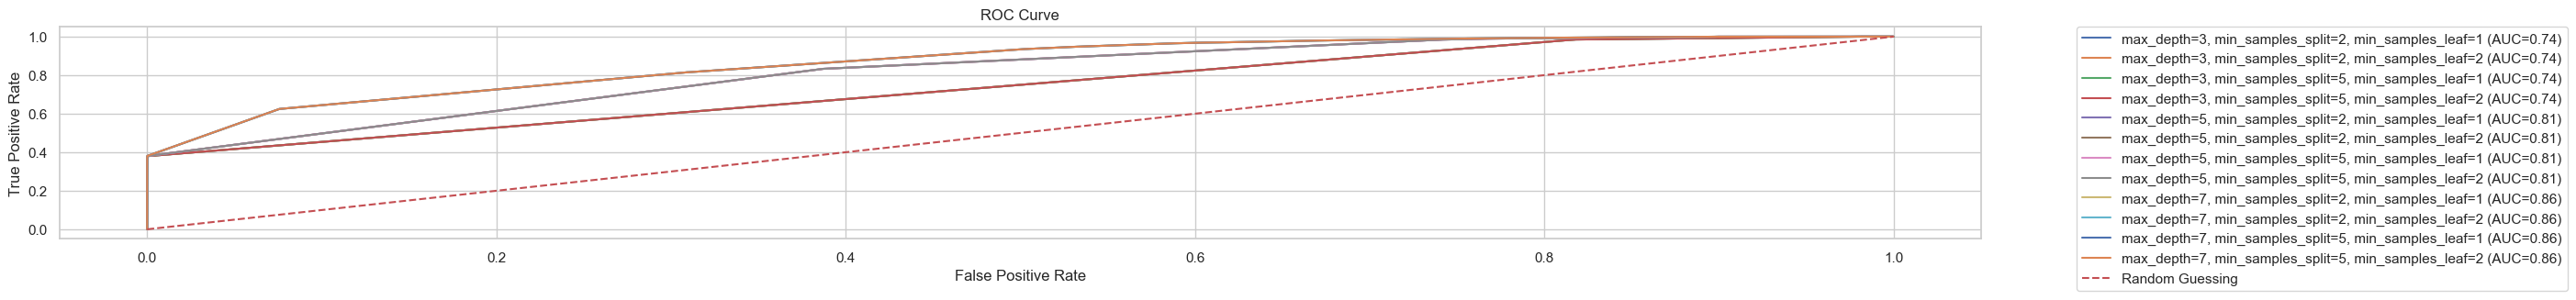

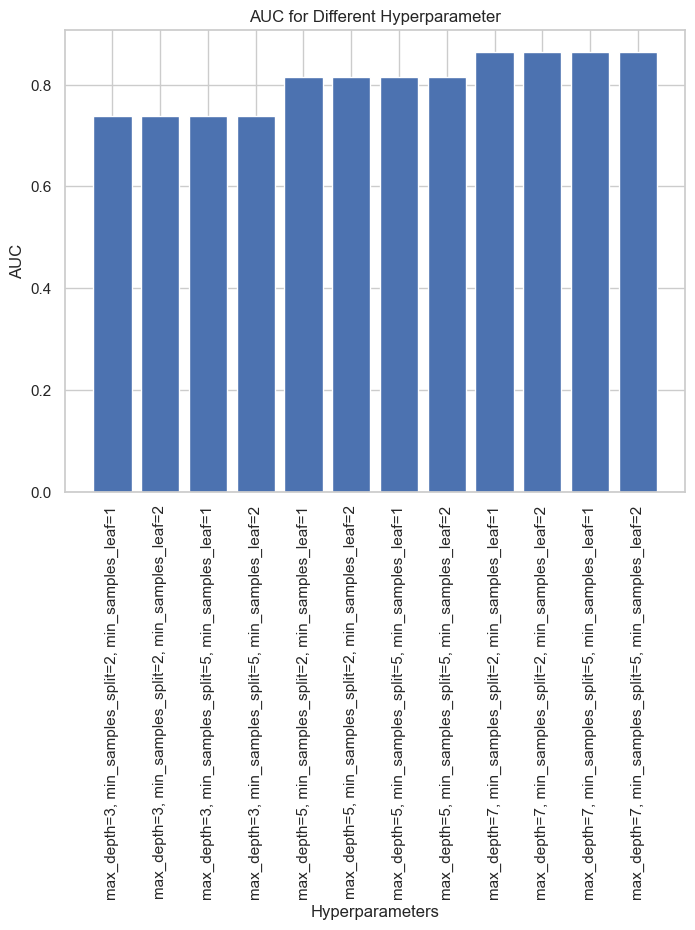

In [32]:
# Hyperparameter Tuning
hyperparameters = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}
roc_auc_values = []
combinations = []

# Train a subset of hyperparameter combinations
for max_depth in hyperparameters['max_depth']:
    for min_samples_split in hyperparameters['min_samples_split']:
        for min_samples_leaf in hyperparameters['min_samples_leaf']:
            model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
            model.fit(X_train, y_train)
            
            y_val_pred_proba = model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_val_pred_proba)
            roc_auc = auc(fpr, tpr)
            roc_auc_values.append(roc_auc)
            combinations.append((max_depth, min_samples_split, min_samples_leaf))
            
            # Plot ROC curve for this model
            plt.plot(fpr, tpr, label=f'max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf} (AUC={roc_auc:.2f})')

# Plot Random Guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Adjust the legend to the right
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# Bar plot for AUCs
plt.figure(figsize=(8, 6))
plt.bar(range(len(roc_auc_values)), roc_auc_values, tick_label=[f'max_depth={comb[0]}, min_samples_split={comb[1]}, min_samples_leaf={comb[2]}' for comb in combinations])
plt.xlabel('Hyperparameters')
plt.ylabel('AUC')
plt.title('AUC for Different Hyperparameter')
plt.xticks(rotation=90)
plt.show()

Best Decision Tree Model:
max_depth=7, min_samples_split=2, min_samples_leaf=1
AUC on Test Set: 0.86
AUC on Test Set: 0.86
-------------------
Decision Tree corss validation Metrics
Average accuracy: 0.7854
Average precision: 0.7957
Average recall: 0.7863
Average f1: 0.7738
Average roc_auc: 0.7422
-------------------
Best Decision Tree Metrics
Accuracy: 0.8103
Precision: 0.8136
Recall: 0.8103
F1 Score: 0.8034
AUC Score: 0.7744


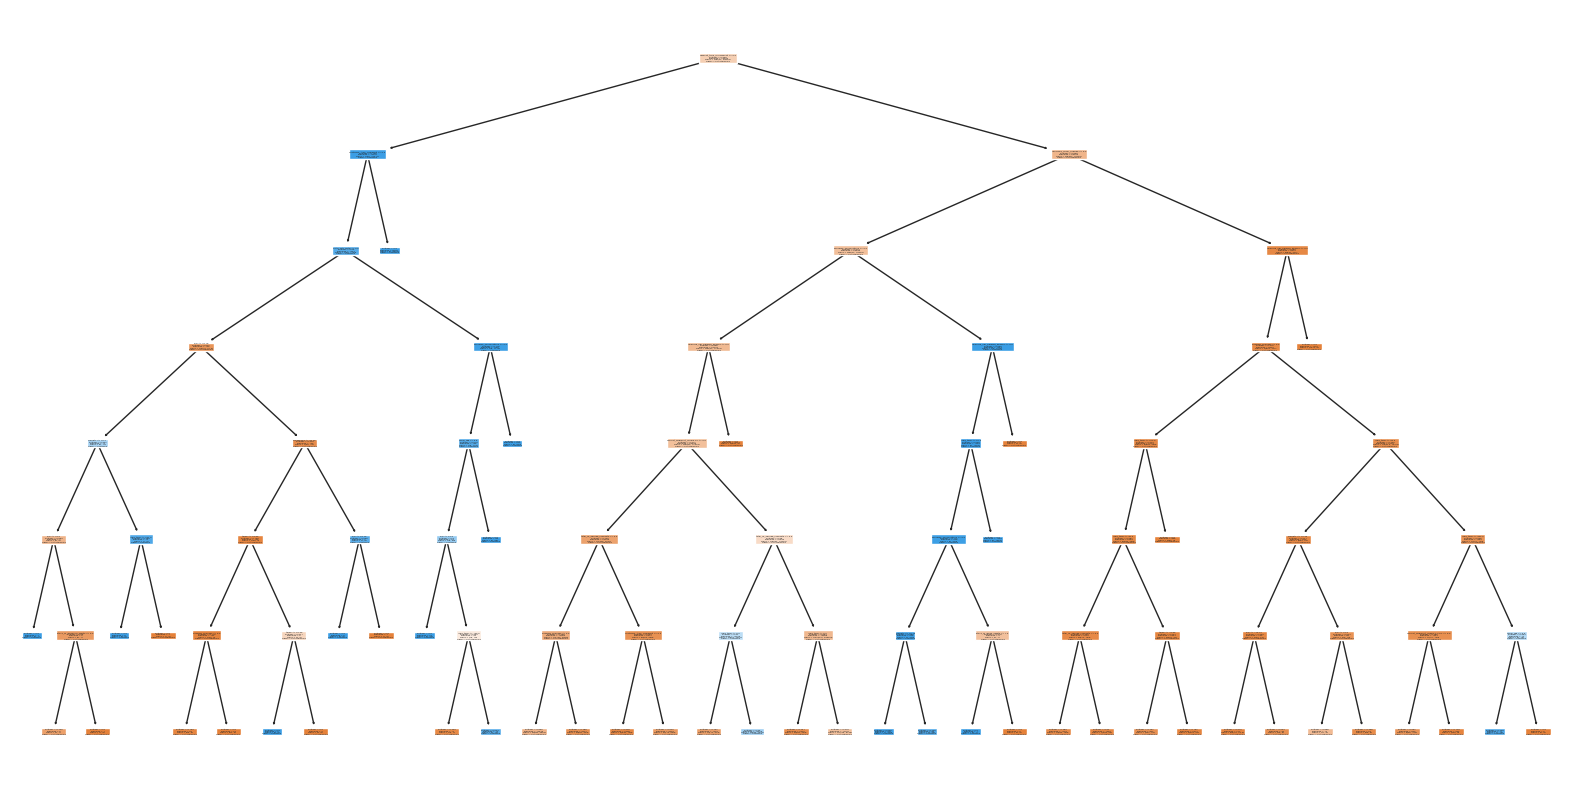

In [33]:
# Find the best model based on AUC
best_model_index = np.argmax(roc_auc_values)
best_max_depth, best_min_samples_split, best_min_samples_leaf = combinations[best_model_index]

best_model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=best_max_depth, min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf)
best_model_dt.fit(X_train, y_train)

print("Best Decision Tree Model:")
print(f"max_depth={best_max_depth}, min_samples_split={best_min_samples_split}, min_samples_leaf={best_min_samples_leaf}")
print(f"AUC on Test Set: {roc_auc_values[best_model_index]:.2f}")

# Evaluate on Test Set
y_test_pred_proba = best_model_dt.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)
print(f"AUC on Test Set: {roc_auc_test:.2f}")

# Calculate metrics on the Test Set
y_test_pred = best_model_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
cv_metrics("Decision Tree",best_model_dt)
metrics_test("Best Decision Tree",y_test,y_test_pred)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_model_dt, feature_names=X.columns, class_names=['Not Canceled', 'Canceled'], filled=True)
plt.show()

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd


# Extracting feature importances
feature_importances = best_model_dt.feature_importances_

# Combine with feature names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print important features and their importance
print("Important Features of Decision Tree:")
print(feature_importance_df.head(10))


Important Features of Decision Tree:
                        Feature  Importance
15      deposit_type_No Deposit    0.501944
11         reserved_room_change    0.094187
7     total_of_special_requests    0.079900
3        previous_cancellations    0.079535
6   required_car_parking_spaces    0.069940
19     market_segment_Online TA    0.064870
0                     lead_time    0.054532
16      customer_type_Transient    0.020688
12             hotel_City Hotel    0.014958
4               booking_changes    0.012475


Reasons for model performance:
- Nonlinear relationships: Decision trees can handle complex nonlinear relationships and feature interactions. For example, the impact of adr and lead_time on the cancellation probability is nonlinear.
- Hyperparameter optimization: Improve model performance by tuning max_depth, min_samples_split and min_samples_leaf.

# 7 Model Selection

To select the best model, we will evaluate three different models: Logistic Regression, Neural Network, and Decision Tree. We will analyze their performance based on accuracy, AUC, and other relevant metrics.

In [58]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Evaluate Logistic Regression
best_logreg = grid_search.best_estimator_
y_test_pred_logreg = best_logreg.predict(X_test)
y_test_pred_proba_logreg = best_logreg.predict_proba(X_test)[:, 1]
metrics_test('Logistic Regression', y_test,y_test_pred_logreg)
# Evaluate Neural Network
preds_nn = np.round(nn_model.predict(X_test), 0)
y_pred_nn_model = (preds_nn > 0.5).astype(int)
metrics_test('Neural Network', y_test,y_pred_nn_model)
# Evaluate Decision Tree
y_test_pred_proba_dtree = best_model_dt.predict_proba(X_test)[:, 1]
y_test_pred_dtree = best_model_dt.predict(X_test)
metrics_test('Decision Tree', y_test,y_test_pred_dtree)


-------------------
Logistic Regression Metrics
Accuracy: 0.8132
Precision: 0.816
Recall: 0.8132
F1 Score: 0.8068
AUC Score: 0.7785
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step
-------------------
Neural Network Metrics
Accuracy: 0.8217
Precision: 0.8223
Recall: 0.8217
F1 Score: 0.8172
AUC Score: 0.7925
-------------------
Decision Tree Metrics
Accuracy: 0.8103
Precision: 0.8136
Recall: 0.8103
F1 Score: 0.8034
AUC Score: 0.7744


|        Model         |  Accuracy  | Precision |  Recall  |  F1 Score |    AUC    |
|----------------------|------------|-----------|----------|-----------|-----------|
| Logistic Regression  |   0.8132   |   0.816   |  0.8132  |   0.8068  |  0.7784   |
|   Neural Network     |   0.8186   |   0.8194  |  0.8186  |   0.8138  |  0.7883   |
|    Decision Tree     |   0.8103   |   0.8136  |  0.8103  |   0.8034  |  0.7744   |

The Neural Network model seems to be the best overall performer, having the highest accuracy, recall, and F1 score, indicating good balance between precision and recall. However, Decision Tree and Logistic Regression have slightly better AUC, suggesting they might distinguish between positive and negative cases better. Ultimately, the choice depends on the specific use case and which metric is most important for your application.

# 8 Ensemble Model

In this section, we will build an ensemble model based on some machine learning models we previously created. Below shows the evaluation metrics for the models we are going to use for the ensemble model.

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train, y_train)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)


knn_pred = knn.predict(X_test)
log_reg_pred = log_reg.predict(X_test)
nb_pred = nb_classifier.predict(X_test)
dt_pred = dt.predict(X_test)

metrics_test("KNN model",y_test,knn_pred)
metrics_test("Logistic Regression",y_test,log_reg_pred)
metrics_test("Naive Beyes",y_test,knn_pred)
metrics_test("Decision Tree",y_test,dt_pred)


-------------------
KNN model Metrics
Accuracy: 0.7583
Precision: 0.7549
Recall: 0.7583
F1 Score: 0.7552
AUC Score: 0.7328
-------------------
Logistic Regression Metrics
Accuracy: 0.8136
Precision: 0.8162
Recall: 0.8136
F1 Score: 0.8073
AUC Score: 0.7792
-------------------
Naive Beyes Metrics
Accuracy: 0.7583
Precision: 0.7549
Recall: 0.7583
F1 Score: 0.7552
AUC Score: 0.7328
-------------------
Decision Tree Metrics
Accuracy: 0.8177
Precision: 0.8179
Recall: 0.8177
F1 Score: 0.8178
AUC Score: 0.8072


In [60]:
ensemble = VotingClassifier(estimators=[
    ('knn', knn),
    ('lr',log_reg),
    ('dt',dt),
    ('nb',nb_classifier)
], voting='soft')
ensemble

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('lr',
                              LogisticRegression(max_iter=10000,
                                                 random_state=42)),
                             ('dt', DecisionTreeClassifier()),
                             ('nb', GaussianNB())],
                 voting='soft')

For our ensemble model, we combines the output of the individual component models to by a VotingClassifier to calculate a prediction. We also uses a 'soft' voting method to avoid when the votes are 2 against 2.    

| Model                | Accuracy | Precision | Recall | F1 Score | AUC Score |
|----------------------|----------|-----------|--------|----------|-----------|
| KNN                  | 0.7583   | 0.7549    | 0.7583 | 0.7551   | 0.7328    |
| Logistic Regression  | 0.8135   | 0.8161    | 0.8135 | 0.8072   | 0.7791    |
| Naive Bayes          | 0.7583   | 0.7549    | 0.7583 | 0.7551   | 0.7328    |
| Decision Tree        | 0.8177   | 0.8180    | 0.8177 | 0.8178   | 0.8074    |
| Ensemble             | __0.8286__   | __0.8276__    | __0.8286__ | __0.8279__   | __0.8145__    |


Compared with the individual component models, the ensemble model has a better performance across all metrics.

In [61]:
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
metrics_test("ensemble model",y_test,y_pred)

-------------------
ensemble model Metrics
Accuracy: 0.8288
Precision: 0.8279
Recall: 0.8288
F1 Score: 0.8282
AUC Score: 0.815


Reasons for model performance:
- Model diversity: It take the advantage of their respective advantages and complement each other. Logistic regression is good at linear relationships, neural network is good at non-linear relationships, decision tree is good at feature interaction, and KNN and Naive Bayes also have unique performances on different features.
- Soft voting strategy: Through the soft voting strategy, the probability predictions of each model can be combined, the comprehensive results are more stable and reliable, and the deviation of a single model is avoided.

# 9 Conclusions

This project focused on predicting hotel booking cancellations using machine learning models and time-series analysis to assist hotels in managing operations more effectively. We use a dataset with booking-related features and weather data to identify key patterns and factors influencing cancellations.

- Key Factors Affecting Booking Cancellations  
We analyzed various models to identify the key factors influencing booking cancellations. Through feature selection and model evaluations, we discovered that variables such as lead time, booking changes, and average daily rates played significant roles in determining the likelihood of cancellations. The important features vary across three different models: Decision Tree, Neural Network, and Logistic Regression. In the Decision Tree model, features such as the absence of a deposit requirement, changes in reserved rooms, and the total number of special requests play significant roles in predicting the cancellation. The Neural Network emphasizes features like bookings made for city hotels, changes in reserved rooms, and average daily rate (ADR), along with customer types and weather conditions. Meanwhile, Logistic Regression highlights the influence of previous cancellations, the requirement of car parking spaces, and the absence of a deposit requirement, with positive coefficients, while the Online TA market segment has a negative coefficient. By accurately identifying these factors, hotels can implement targeted strategies, such as offering incentives for longer stays or adjusting cancellation policies, to reduce the impact of cancellations.

- Predicting Daily Hotel Booking Volumes Using Time-Series Analysis  
To forecast hotel booking volumes and help optimize hotel strategy, we employed time-series analysis through SARIMA models on daily and monthly data. The analysis revealed consistent seasonal trends, enabling us to anticipate booking volumes with reasonable accuracy. AAlthough the monthly cycle model did not provide a better fit, we can consider incorporating machine learning models and other variables to predict the number of reservations or anticipate cancellations. The Time-Series model still offers a valuable approach for forecasting.

- Machine Learning Model Performance  
Among the machine learning models, the Neural Network model demonstrated strong predictive performance with high accuracy, recall, and F1 score. The Decision Tree model provided interpretability while achieving good accuracy, and Logistic Regression presented robust AUC scores. However, combining these models into an ensemble further improved prediction accuracy to 82.86% and other metrics. The ensemble approach aggregated the strengths of individual models, allowing the model to handle the complexities and nuances of the data effectively.

In conclusion, our predictive model provides practical insights for hotels to anticipate booking cancellations and manage daily booking volumes. By incorporating machine learning and time-series analysis, hotels can enhance operational efficiency and profitability. Future research could focus on refining these models with additional data sources and more advanced techniques to further improve prediction accuracy.

## References
__Dataset source__: https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-02-11


__Domain Knowledge__:  
Antonio, N., de Almeida, A., and Nunes, L. (2019). Hotel booking demand datasets: https://www.sciencedirect.com/science/article/pii/S2352340918315191  

- https://keras.io/api/layers/
- https://scikit-learn.org/stable/modules/ensemble.html
- https://medium.com/luca-chuangs-bapm-notes/build-a-neural-network-in-python-binary-classification-49596d7dcabf
- https://medium.com/ai-advances/boost-your-ml-models-performance-with-ensemble-modeling-9d0d5df8f307